In [1]:
import pandas as pd

# Load the edges data
edges_file = 'lastfm_asia_edges.csv'
edges_df = pd.read_csv(edges_file)

# Load the target data
target_file = 'lastfm_asia_target.csv'
target_df = pd.read_csv(target_file)


In [2]:
# Display the first few rows of each DataFrame
print("Edges DataFrame:")
print(edges_df.head())

print("\nTarget DataFrame:")
print(target_df.head())

# Get basic information about each DataFrame
print("\nEdges DataFrame Info:")
print(edges_df.info())

print("\nTarget DataFrame Info:")
print(target_df.info())


Edges DataFrame:
   node_1  node_2
0       0     747
1       1    4257
2       1    2194
3       1     580
4       1    6478

Target DataFrame:
   id  target
0   0       8
1   1      17
2   2       3
3   3      17
4   4       5

Edges DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27806 entries, 0 to 27805
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   node_1  27806 non-null  int64
 1   node_2  27806 non-null  int64
dtypes: int64(2)
memory usage: 434.6 KB
None

Target DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7624 entries, 0 to 7623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      7624 non-null   int64
 1   target  7624 non-null   int64
dtypes: int64(2)
memory usage: 119.3 KB
None


In [3]:
# Summary statistics for edges data
print("\nSummary Statistics for Edges DataFrame:")
print(edges_df.describe())

# Summary statistics for target data
print("\nSummary Statistics for Target DataFrame:")
print(target_df.describe())

# Analyze the distribution of node degrees
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges from the DataFrame
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]

print("\nDegree Distribution:")
print(pd.Series(degree_sequence).describe())



Summary Statistics for Edges DataFrame:
             node_1        node_2
count  27806.000000  27806.000000
mean    2540.629073   5050.508523
std     1760.146912   1784.037694
min        0.000000      6.000000
25%     1065.000000   3715.000000
50%     2233.000000   5351.500000
75%     3738.000000   6538.000000
max     7580.000000   7623.000000

Summary Statistics for Target DataFrame:
                id       target
count  7624.000000  7624.000000
mean   3811.500000     9.339979
std    2201.003559     5.917230
min       0.000000     0.000000
25%    1905.750000     5.000000
50%    3811.500000    10.000000
75%    5717.250000    15.000000
max    7623.000000    17.000000

Degree Distribution:
count    7624.000000
mean        7.294334
std        11.499873
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max       216.000000
dtype: float64


Number of nodes: 7624
Number of edges: 27806


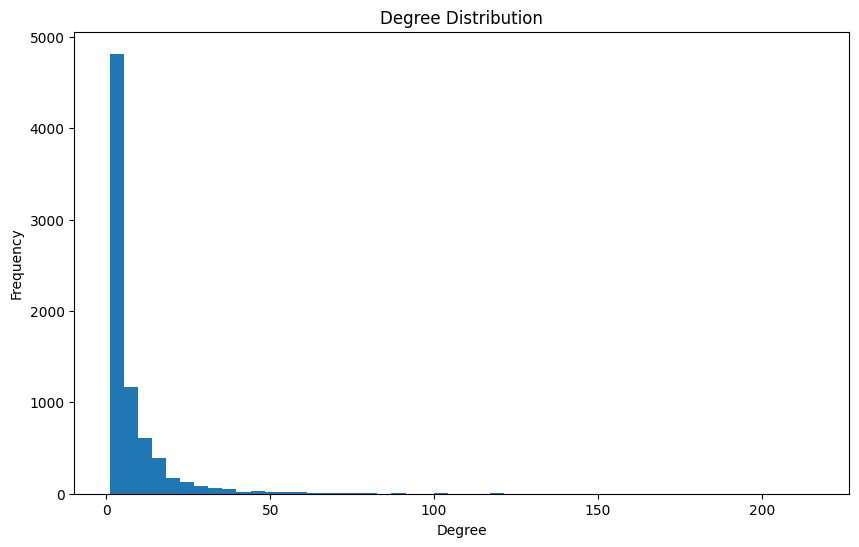

In [4]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges from the DataFrame
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

# Check basic properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]

# Plot degree distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


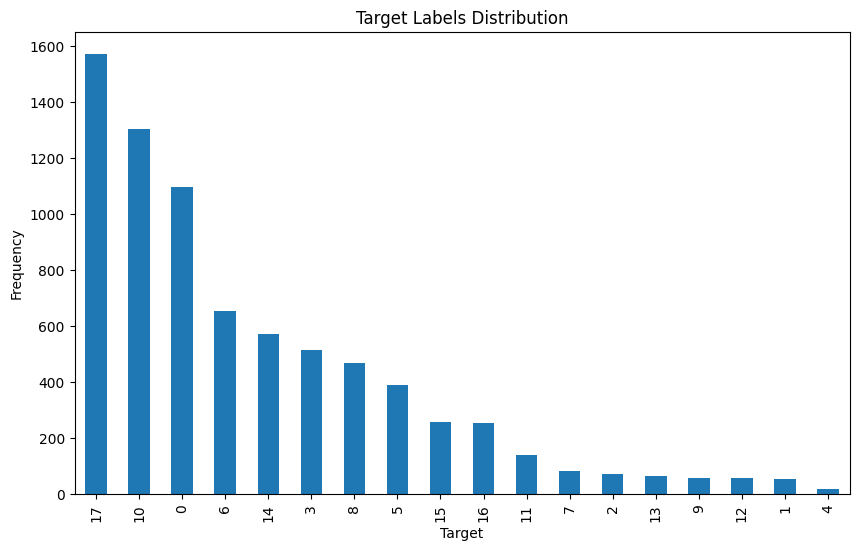

In [5]:
# Visualize target labels distribution using the correct column name 'target'
plt.figure(figsize=(10, 6))
target_df['target'].value_counts().plot(kind='bar')
plt.title('Target Labels Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


Computing resilience for the graph...
Progress: 10.0% - Nodes processed: 762
Progress: 20.0% - Nodes processed: 1524
Progress: 30.0% - Nodes processed: 2286
Progress: 40.0% - Nodes processed: 3048
Progress: 50.0% - Nodes processed: 3810
Progress: 60.0% - Nodes processed: 4572
Progress: 70.0% - Nodes processed: 5334
Progress: 80.0% - Nodes processed: 6096
Progress: 90.0% - Nodes processed: 6858
Progress: 99.9% - Nodes processed: 7620


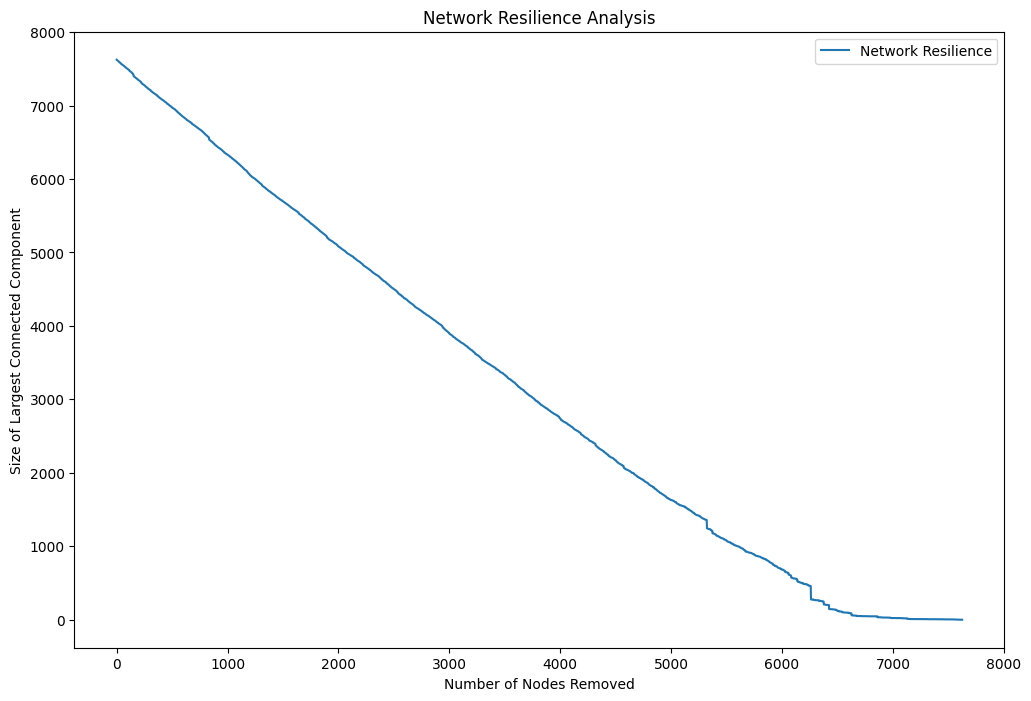

In [6]:
import random
def random_order(graph):
    """
    Generate a random order of nodes for attacking the graph.
    """
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

def compute_resilience(graph, attack_order):
    """
    Compute the resilience of the graph as nodes are removed according to attack_order.
    """
    resilience = [len(max(nx.connected_components(graph), key=len, default=set()))]
    total = len(attack_order)
    for i, node in enumerate(attack_order):
        graph.remove_node(node)
        remaining_components = list(nx.connected_components(graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience

# Generate a random attack order
attack_order = random_order(G)

# Compute resilience
print("Computing resilience for the graph...")
resilience = compute_resilience(G.copy(), attack_order)

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience, label='Network Resilience')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Network Resilience Analysis')
plt.legend()
plt.show()


In [7]:
def random_order(graph):
    """
    Generate a random order of nodes for attacking the graph.
    """
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

def compute_resilience(graph, attack_order):
    """
    Compute the resilience of the graph as nodes are removed according to attack_order.
    """
    resilience = [len(max(nx.connected_components(graph), key=len, default=set()))]
    total = len(attack_order)
    for i, node in enumerate(attack_order):
        graph.remove_node(node)
        remaining_components = list(nx.connected_components(graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience


In [8]:

import numpy as np

def generate_chung_lu(graph):
    """
    Generate a Chung Lu graph model based on the degree distribution of the input graph.
    """
    degree_sequence = [degree for node, degree in graph.degree()]
    W = np.array(degree_sequence)
    W_sum = sum(W)
    n = len(W)
    CL_graph = nx.Graph()
    CL_graph.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            p = (W[i] * W[j]) / (2 * W_sum)
            if np.random.rand() < p:
                CL_graph.add_edge(i, j)
    return CL_graph


def UPA_graph(n, m):
    """
    Generate an UPA graph using NetworkX's powerlaw_cluster_graph.
    """
    return nx.powerlaw_cluster_graph(n, m, 0.0)

# Generate Chung Lu and UPA models
chung_lu_graph = generate_chung_lu(G)
upa_graph = UPA_graph(G.number_of_nodes(), 3)  # Adjust 'm' based on the average degree of the original graph


Computing resilience for the original graph...
Progress: 10.0% - Nodes processed: 762
Progress: 20.0% - Nodes processed: 1524
Progress: 30.0% - Nodes processed: 2286
Progress: 40.0% - Nodes processed: 3048
Progress: 50.0% - Nodes processed: 3810
Progress: 60.0% - Nodes processed: 4572
Progress: 70.0% - Nodes processed: 5334
Progress: 80.0% - Nodes processed: 6096
Progress: 90.0% - Nodes processed: 6858
Progress: 99.9% - Nodes processed: 7620
Computing resilience for the Chung Lu model...
Progress: 10.0% - Nodes processed: 762
Progress: 20.0% - Nodes processed: 1524
Progress: 30.0% - Nodes processed: 2286
Progress: 40.0% - Nodes processed: 3048
Progress: 50.0% - Nodes processed: 3810
Progress: 60.0% - Nodes processed: 4572
Progress: 70.0% - Nodes processed: 5334
Progress: 80.0% - Nodes processed: 6096
Progress: 90.0% - Nodes processed: 6858
Progress: 99.9% - Nodes processed: 7620
Computing resilience for the UPA model...
Progress: 10.0% - Nodes processed: 762
Progress: 20.0% - Nodes pro

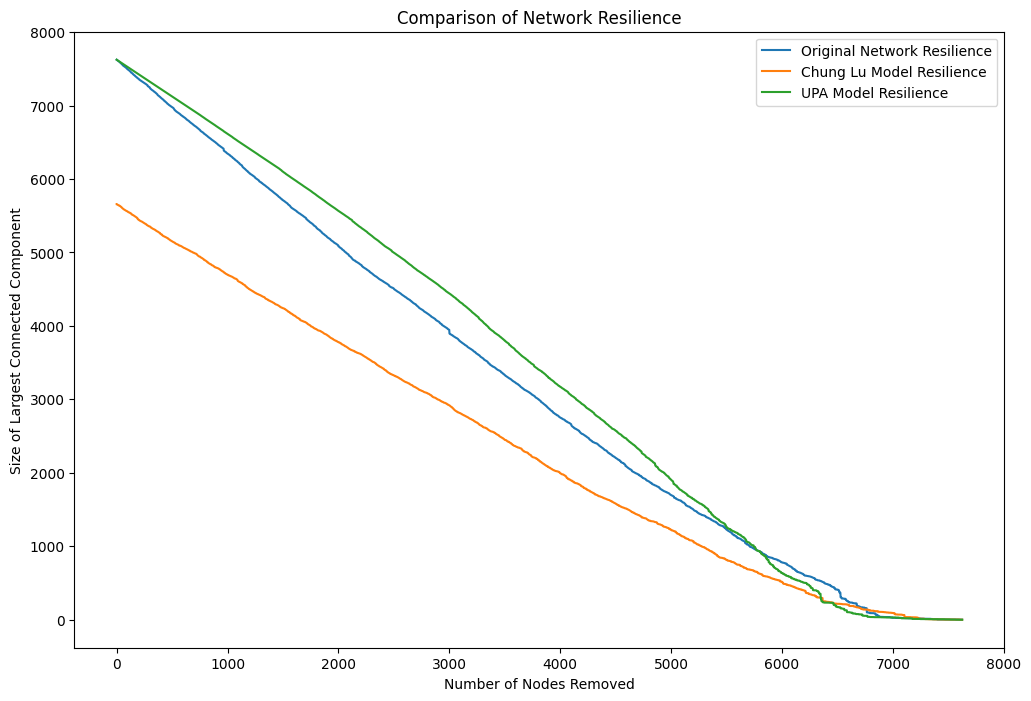

In [9]:
# Generate attack orders
attack_order_original = random_order(G)
attack_order_cl = random_order(chung_lu_graph)
attack_order_upa = random_order(upa_graph)

# Compute resilience
print("Computing resilience for the original graph...")
resilience_original = compute_resilience(G.copy(), attack_order_original)
print("Computing resilience for the Chung Lu model...")
resilience_cl = compute_resilience(chung_lu_graph.copy(), attack_order_cl)
print("Computing resilience for the UPA model...")
resilience_upa = compute_resilience(upa_graph.copy(), attack_order_upa)

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience_original, label='Original Network Resilience')
plt.plot(resilience_cl, label='Chung Lu Model Resilience')
plt.plot(resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience')
plt.legend()
plt.show()


In [10]:
def random_order(graph):
    """
    Generate a random order of nodes for adding to the graph.
    """
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

def compute_resilience_adding_nodes(graph, attack_order):
    """
    Compute the resilience of the graph as nodes are added according to attack_order.
    """
    initial_nodes = graph.number_of_nodes()
    resilience = [len(max(nx.connected_components(graph), key=len, default=set()))]
    total = len(attack_order)
    added_graph = nx.Graph()
    
    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        # Add edges connected to the new node
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience


Computing resilience for the original graph by adding nodes...
Progress: 10.0% - Nodes processed: 762
Progress: 20.0% - Nodes processed: 1524
Progress: 30.0% - Nodes processed: 2286
Progress: 40.0% - Nodes processed: 3048
Progress: 50.0% - Nodes processed: 3810
Progress: 60.0% - Nodes processed: 4572
Progress: 70.0% - Nodes processed: 5334
Progress: 80.0% - Nodes processed: 6096
Progress: 90.0% - Nodes processed: 6858
Progress: 99.9% - Nodes processed: 7620
Computing resilience for the Chung Lu model by adding nodes...
Progress: 10.0% - Nodes processed: 762
Progress: 20.0% - Nodes processed: 1524
Progress: 30.0% - Nodes processed: 2286
Progress: 40.0% - Nodes processed: 3048
Progress: 50.0% - Nodes processed: 3810
Progress: 60.0% - Nodes processed: 4572
Progress: 70.0% - Nodes processed: 5334
Progress: 80.0% - Nodes processed: 6096
Progress: 90.0% - Nodes processed: 6858
Progress: 99.9% - Nodes processed: 7620
Computing resilience for the UPA model by adding nodes...
Progress: 10.0% - 

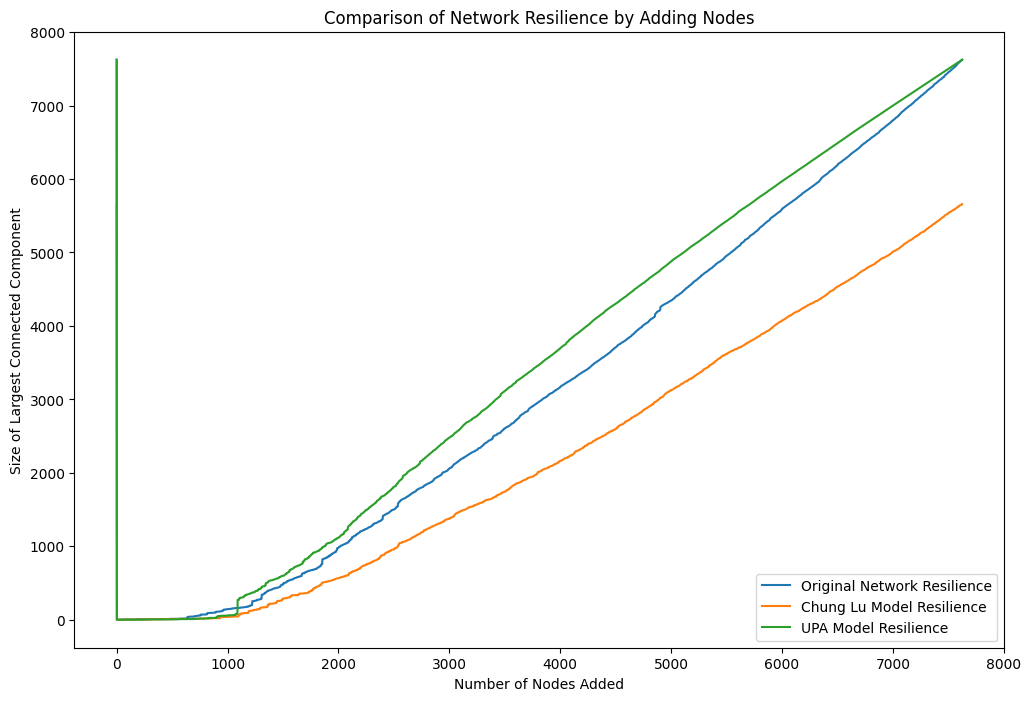

In [11]:
# Generate attack orders
attack_order_original = random_order(G)
attack_order_cl = random_order(chung_lu_graph)
attack_order_upa = random_order(upa_graph)

# Compute resilience by adding nodes
print("Computing resilience for the original graph by adding nodes...")
resilience_original = compute_resilience_adding_nodes(G, attack_order_original)
print("Computing resilience for the Chung Lu model by adding nodes...")
resilience_cl = compute_resilience_adding_nodes(chung_lu_graph, attack_order_cl)
print("Computing resilience for the UPA model by adding nodes...")
resilience_upa = compute_resilience_adding_nodes(upa_graph, attack_order_upa)

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience_original, label='Original Network Resilience')
plt.plot(resilience_cl, label='Chung Lu Model Resilience')
plt.plot(resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Adding Nodes')
plt.legend()
plt.show()


In [12]:
def random_order(graph):
    """
    Generate a random order of nodes for adding to the graph.
    """
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes


In [13]:
def compute_resilience_adding_nodes(graph, attack_order):
    """
    Compute the resilience of the graph as nodes are added according to attack_order.
    """
    resilience = [0]  # Start with an empty graph
    total = len(attack_order)
    added_graph = nx.Graph()
    
    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        # Add edges connected to the new node
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience


Computing resilience for the original graph by adding nodes...
Progress: 10.0% - Nodes processed: 762
Progress: 20.0% - Nodes processed: 1524
Progress: 30.0% - Nodes processed: 2286
Progress: 40.0% - Nodes processed: 3048
Progress: 50.0% - Nodes processed: 3810
Progress: 60.0% - Nodes processed: 4572
Progress: 70.0% - Nodes processed: 5334
Progress: 80.0% - Nodes processed: 6096
Progress: 90.0% - Nodes processed: 6858
Progress: 99.9% - Nodes processed: 7620
Computing resilience for the Chung Lu model by adding nodes...
Progress: 10.0% - Nodes processed: 762
Progress: 20.0% - Nodes processed: 1524
Progress: 30.0% - Nodes processed: 2286
Progress: 40.0% - Nodes processed: 3048
Progress: 50.0% - Nodes processed: 3810
Progress: 60.0% - Nodes processed: 4572
Progress: 70.0% - Nodes processed: 5334
Progress: 80.0% - Nodes processed: 6096
Progress: 90.0% - Nodes processed: 6858
Progress: 99.9% - Nodes processed: 7620
Computing resilience for the UPA model by adding nodes...
Progress: 10.0% - 

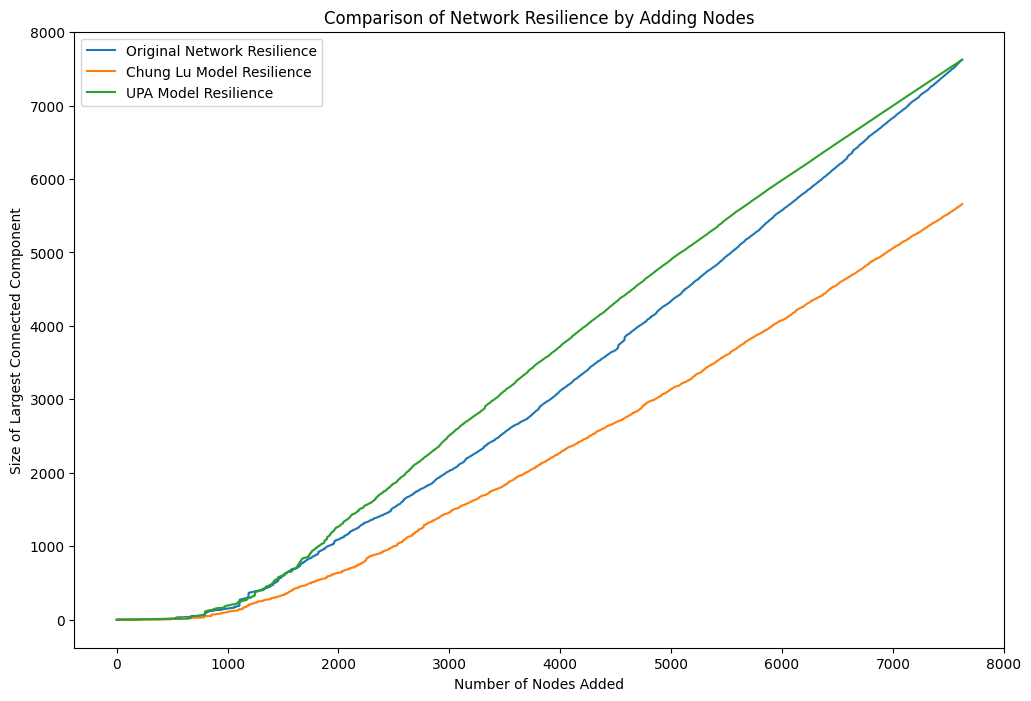

In [14]:
# Generate a random order for adding nodes
attack_order_original = random_order(G)
attack_order_cl = random_order(chung_lu_graph)
attack_order_upa = random_order(upa_graph)

# Compute resilience by adding nodes
print("Computing resilience for the original graph by adding nodes...")
resilience_original = compute_resilience_adding_nodes(G, attack_order_original)
print("Computing resilience for the Chung Lu model by adding nodes...")
resilience_cl = compute_resilience_adding_nodes(chung_lu_graph, attack_order_cl)
print("Computing resilience for the UPA model by adding nodes...")
resilience_upa = compute_resilience_adding_nodes(upa_graph, attack_order_upa)

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience_original, label='Original Network Resilience')
plt.plot(resilience_cl, label='Chung Lu Model Resilience')
plt.plot(resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Adding Nodes')
plt.legend()
plt.show()


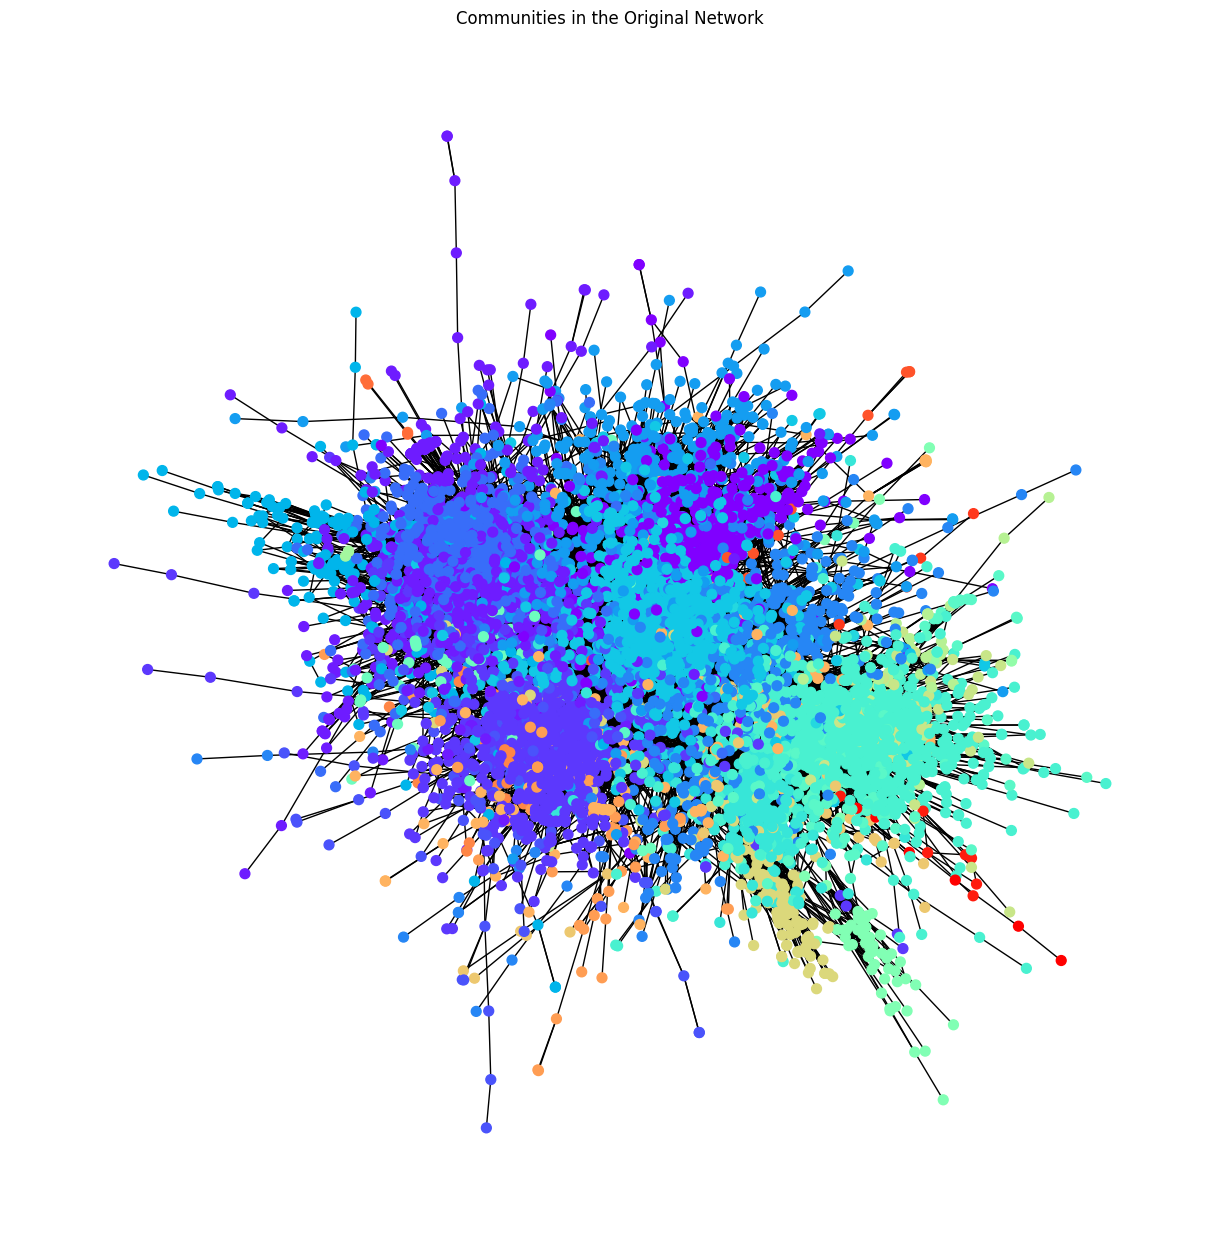

In [15]:
from community import community_louvain

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)

# Add community labels to the nodes
nx.set_node_attributes(G, partition, 'community')

# Visualize the communities
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=50, cmap=plt.cm.rainbow)
plt.title('Communities in the Original Network')
plt.show()


In [16]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges from the DataFrame
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)

# Convert partition to a format suitable for further analysis
communities = {}
for node, comm in partition.items():
    if comm not in communities:
        communities[comm] = []
    communities[comm].append(node)

# Print the number of communities
print(f"Number of communities detected: {len(communities)}")


Number of communities detected: 30


Computing community resilience for the original graph by adding nodes...
Progress: 9.8% - Nodes processed: 53
Progress: 19.7% - Nodes processed: 106
Progress: 29.5% - Nodes processed: 159
Progress: 39.3% - Nodes processed: 212
Progress: 49.2% - Nodes processed: 265
Progress: 59.0% - Nodes processed: 318
Progress: 68.8% - Nodes processed: 371
Progress: 78.7% - Nodes processed: 424
Progress: 88.5% - Nodes processed: 477
Progress: 98.3% - Nodes processed: 530
Progress: 9.9% - Nodes processed: 146
Progress: 19.9% - Nodes processed: 292
Progress: 29.8% - Nodes processed: 438
Progress: 39.8% - Nodes processed: 584
Progress: 49.7% - Nodes processed: 730
Progress: 59.6% - Nodes processed: 876
Progress: 69.6% - Nodes processed: 1022
Progress: 79.5% - Nodes processed: 1168
Progress: 89.4% - Nodes processed: 1314
Progress: 99.4% - Nodes processed: 1460
Progress: 9.9% - Nodes processed: 50
Progress: 19.8% - Nodes processed: 100
Progress: 29.8% - Nodes processed: 150
Progress: 39.7% - Nodes process

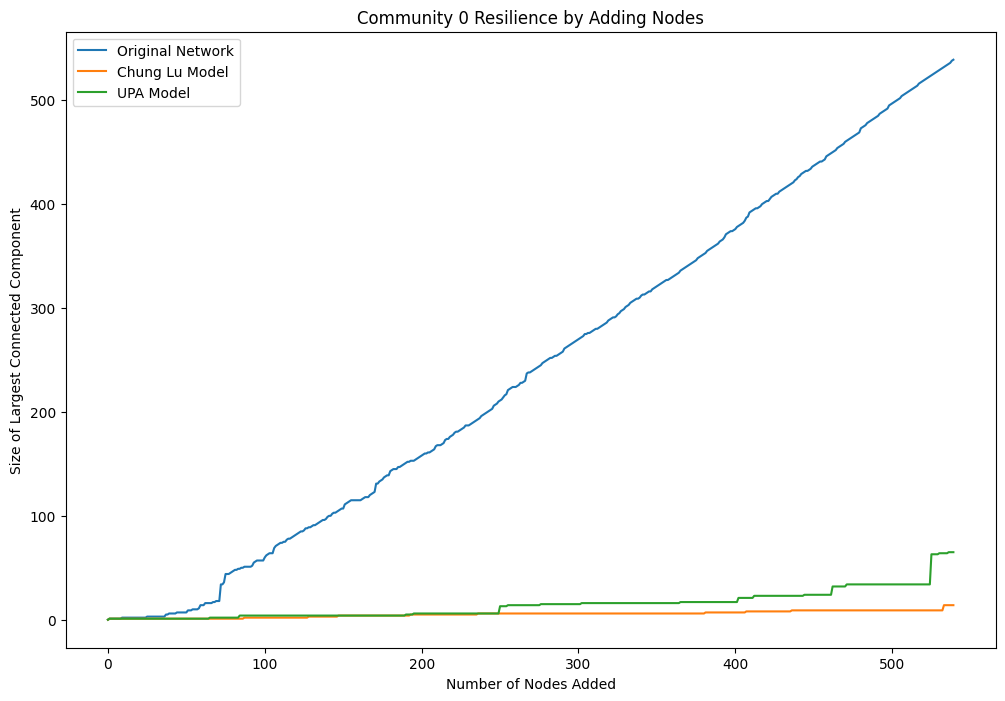

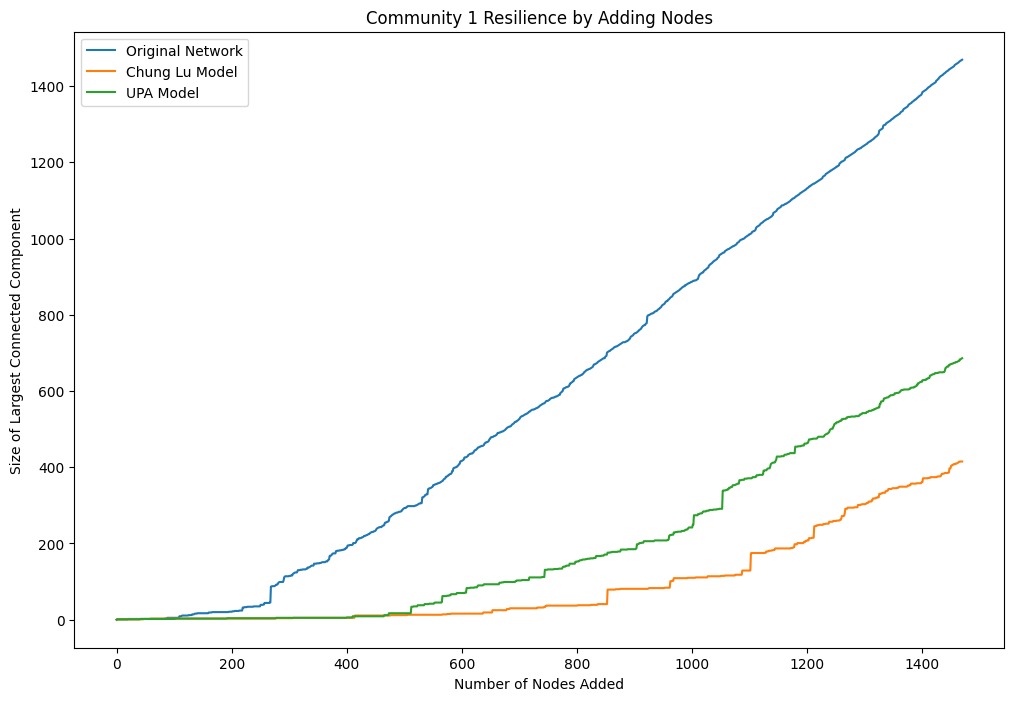

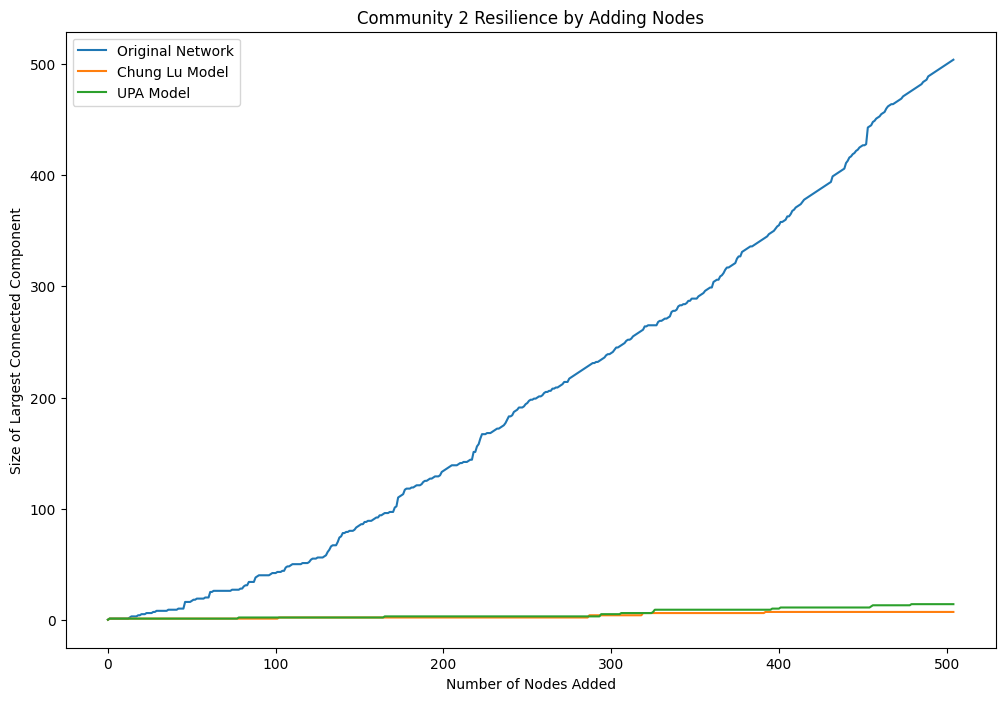

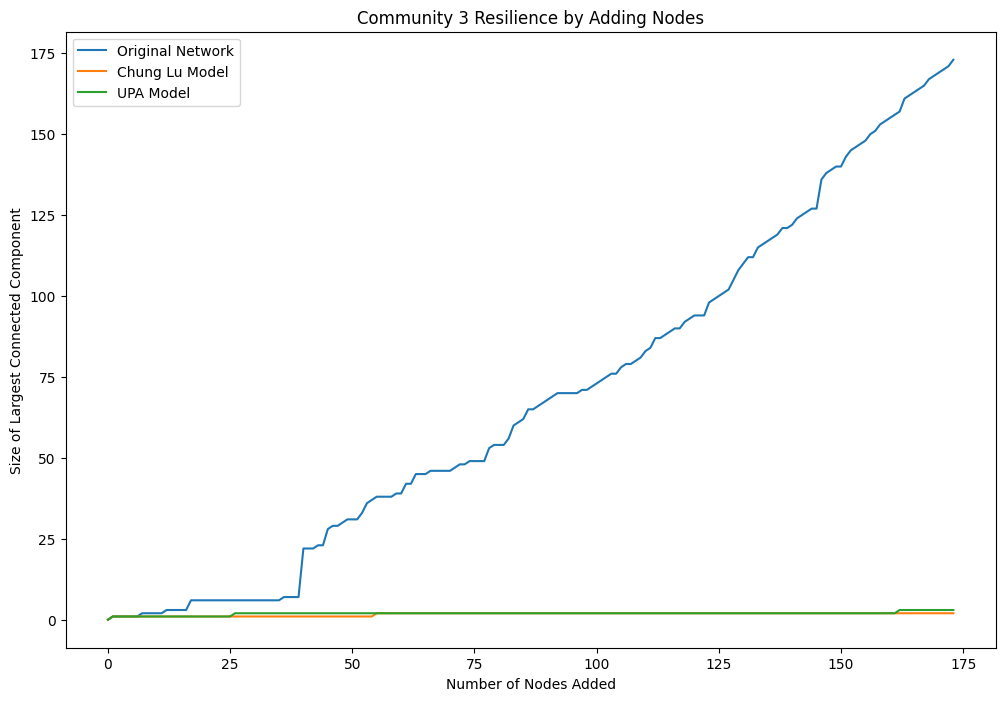

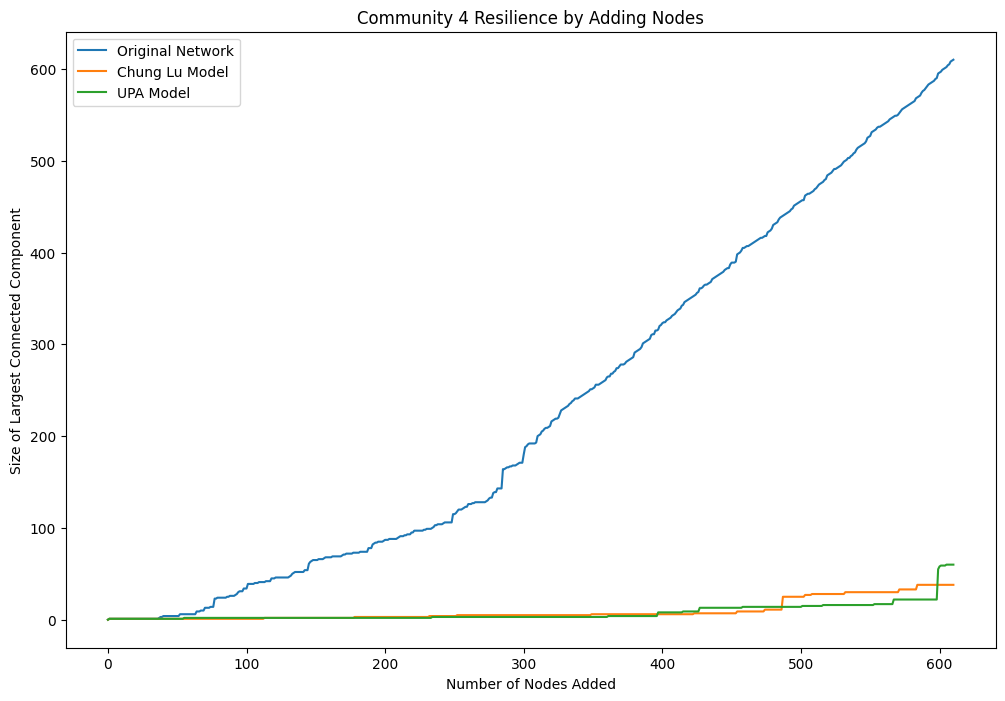

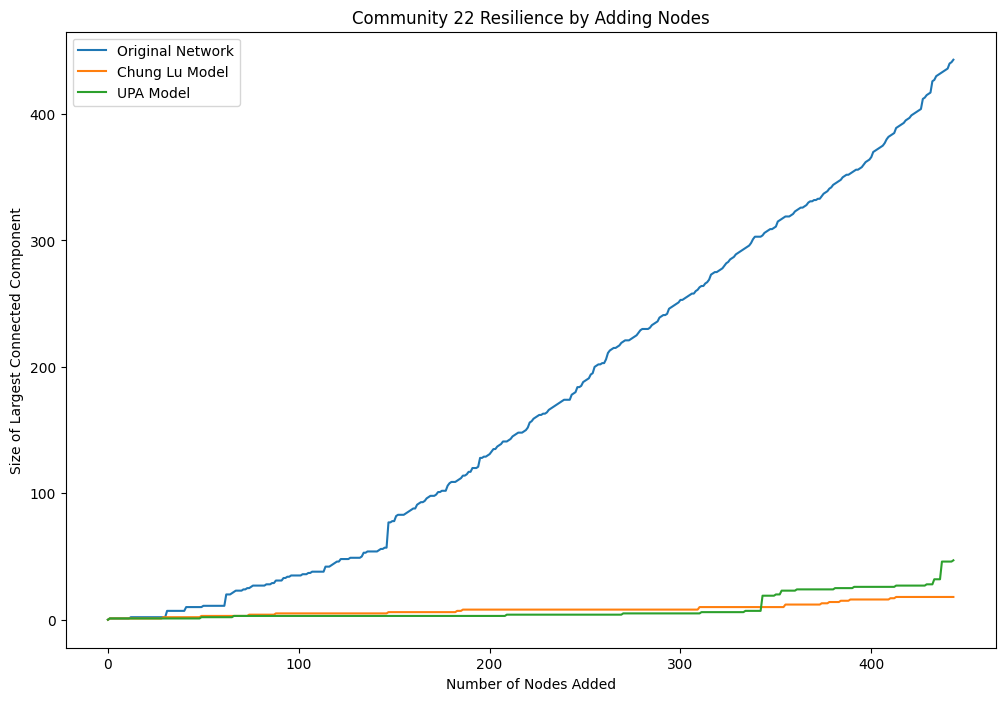

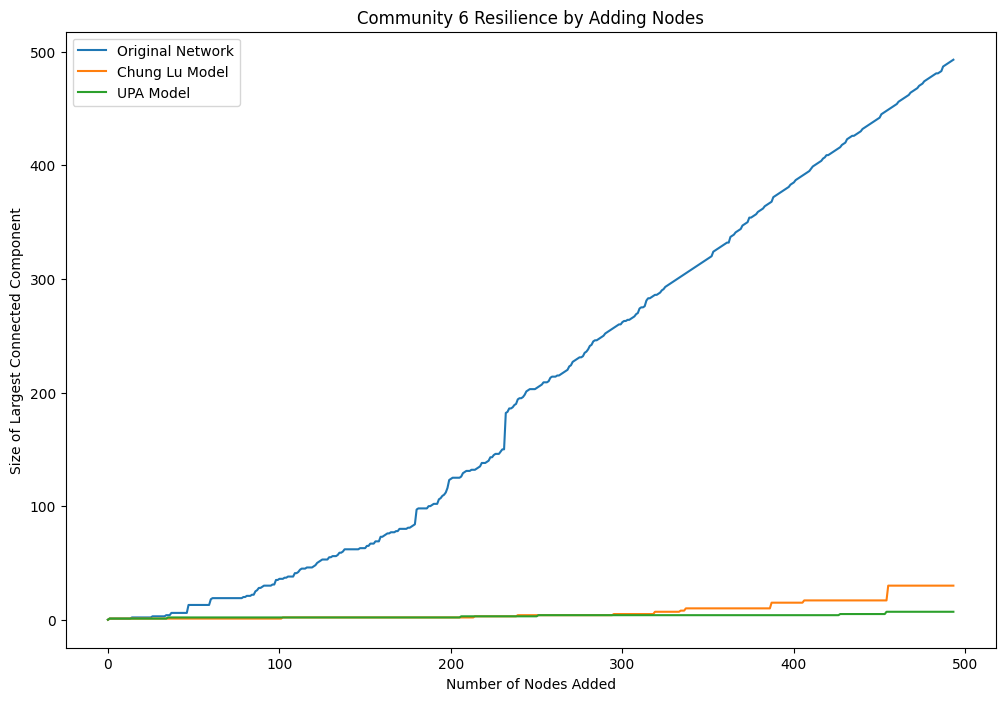

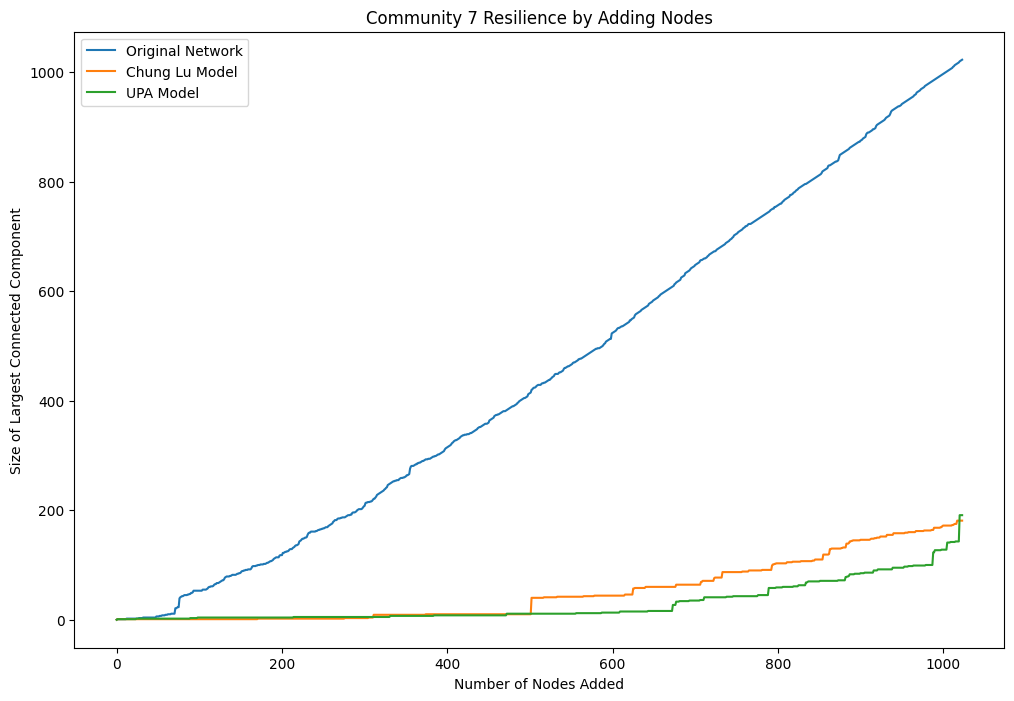

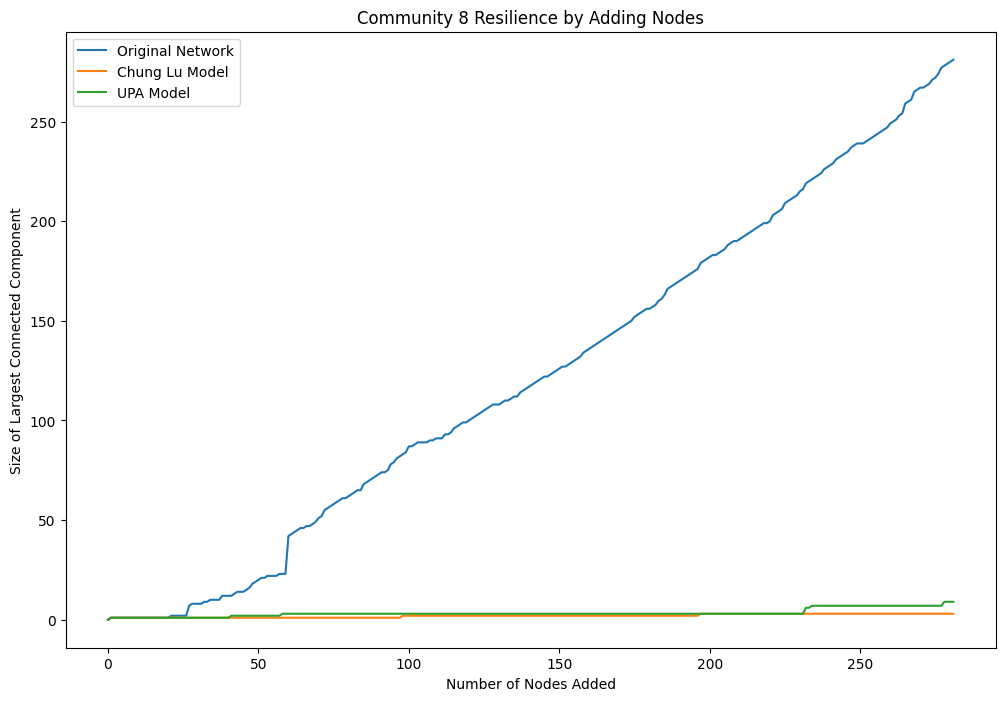

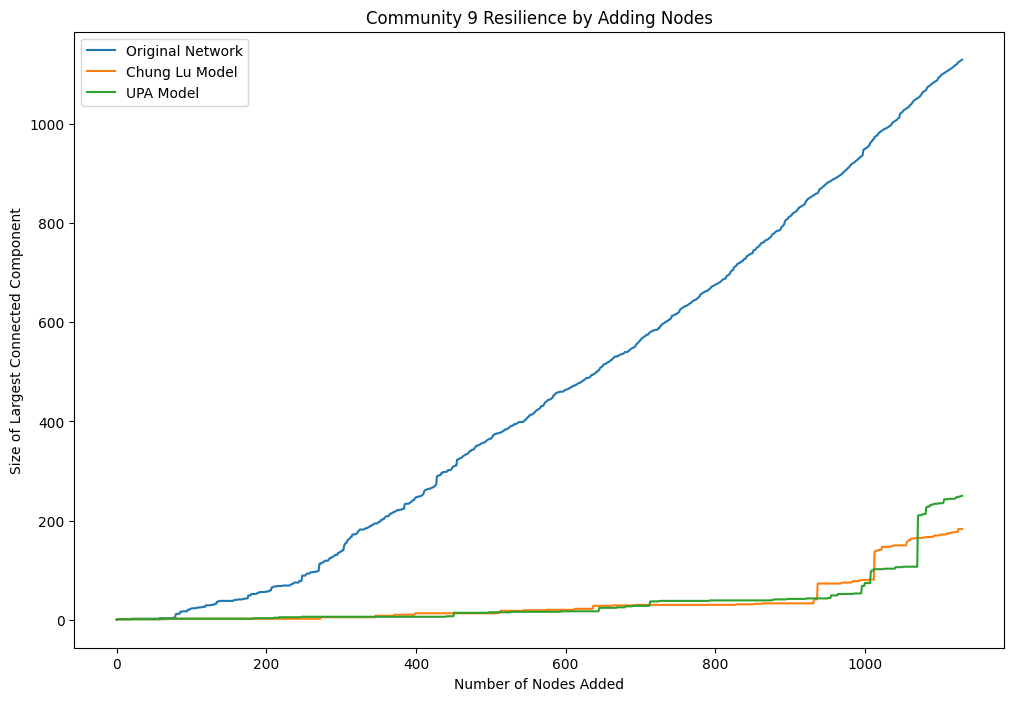

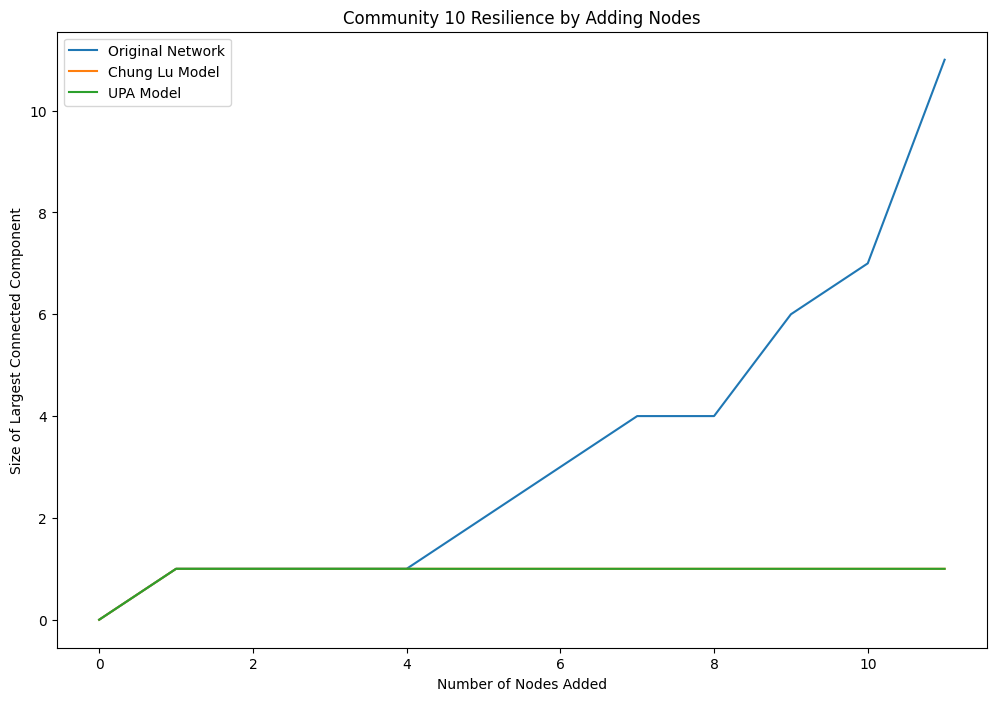

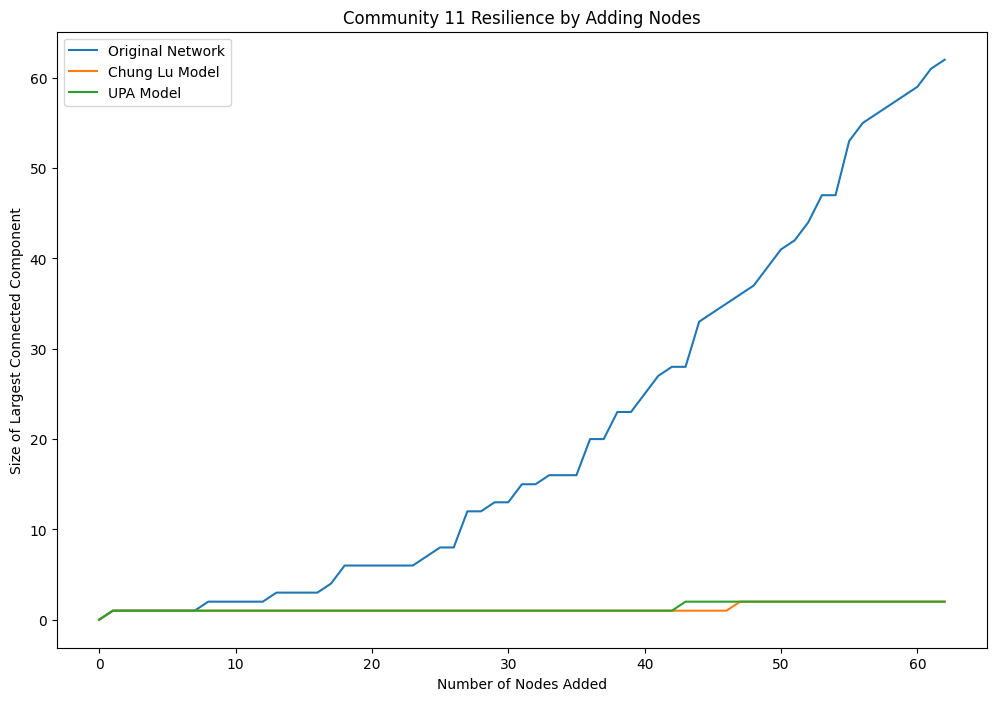

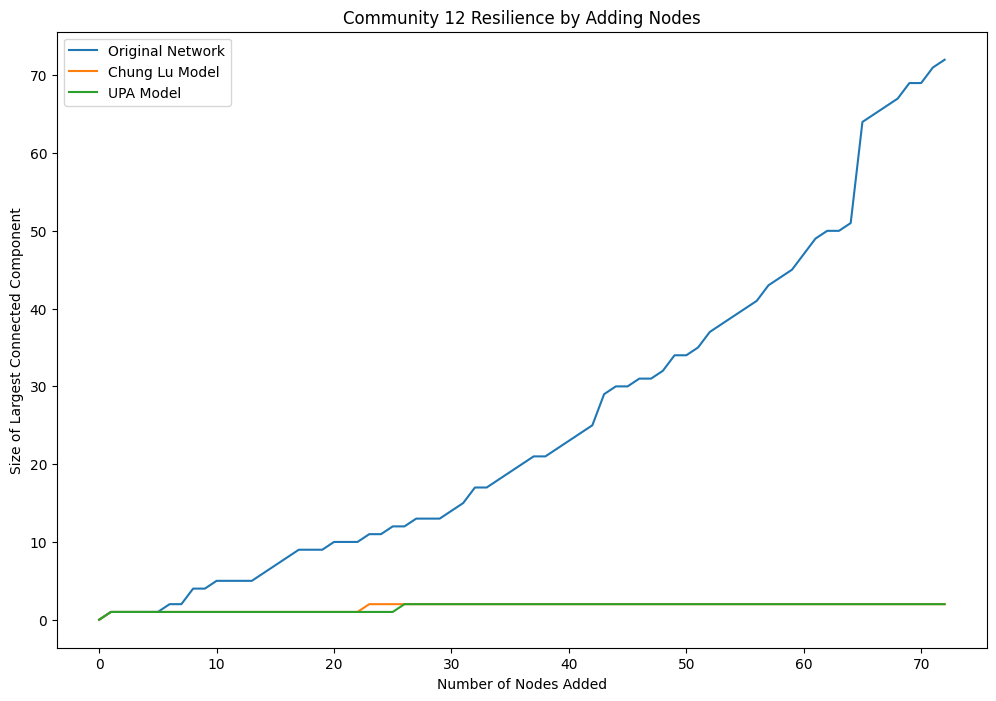

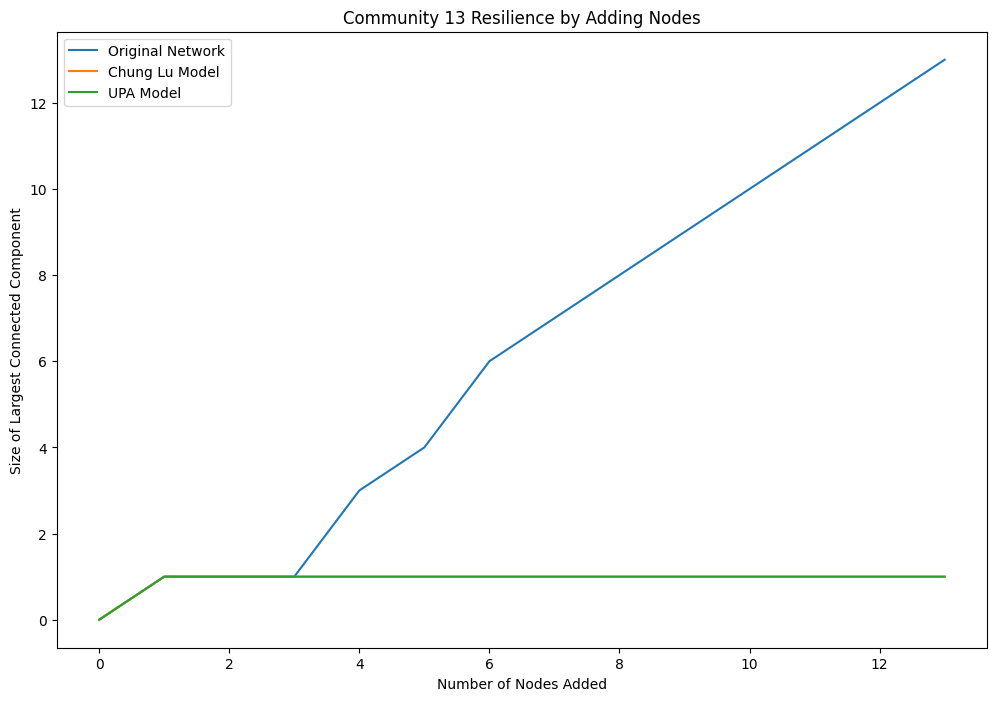

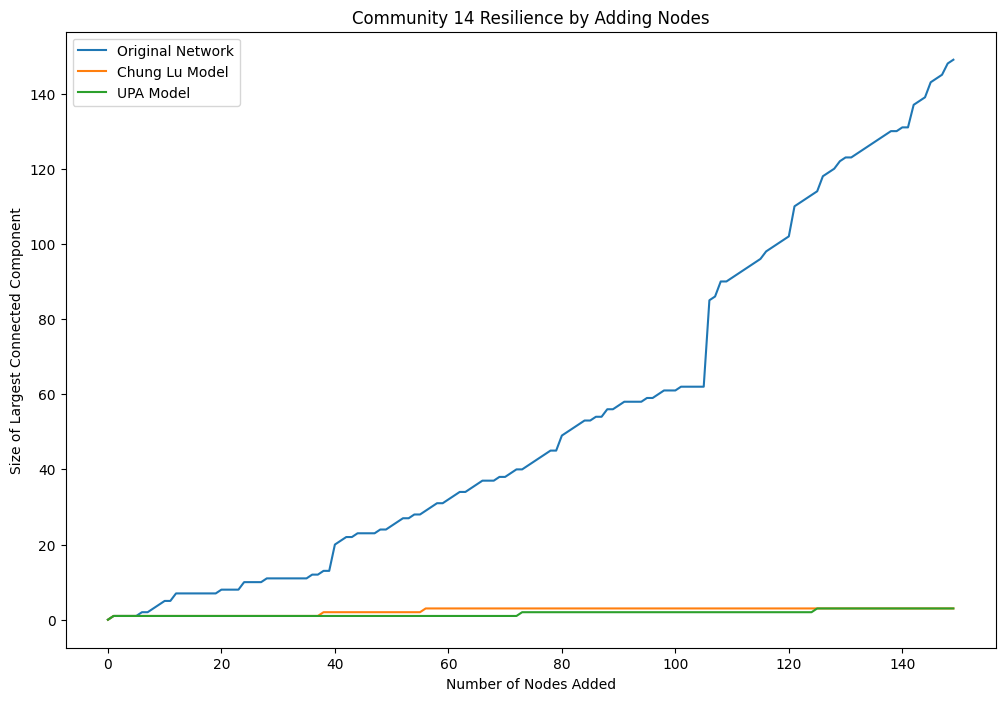

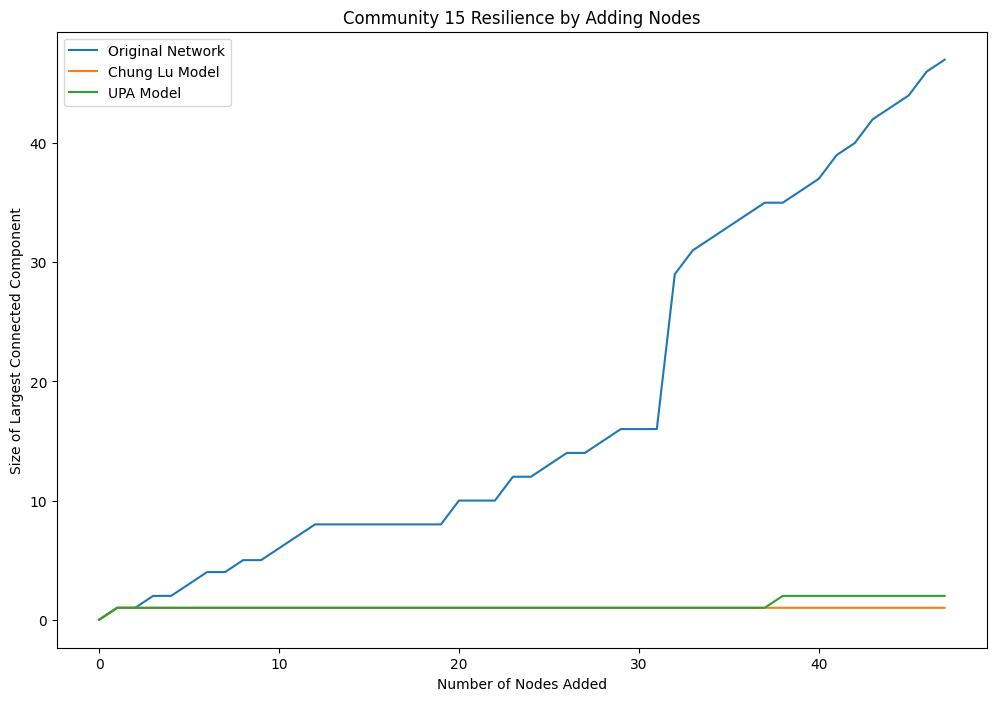

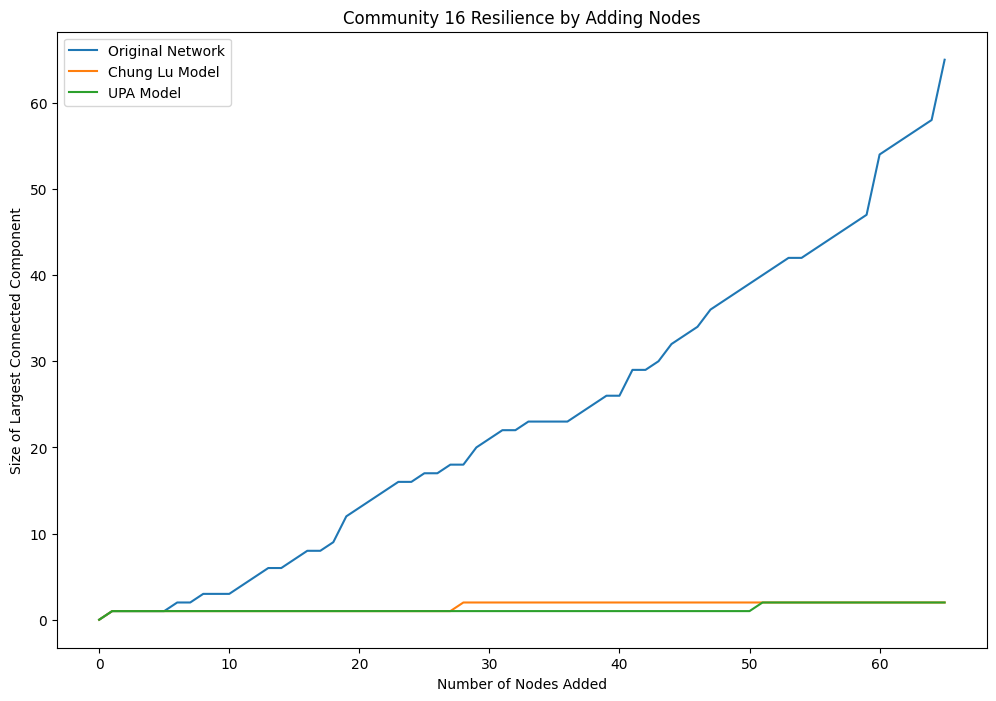

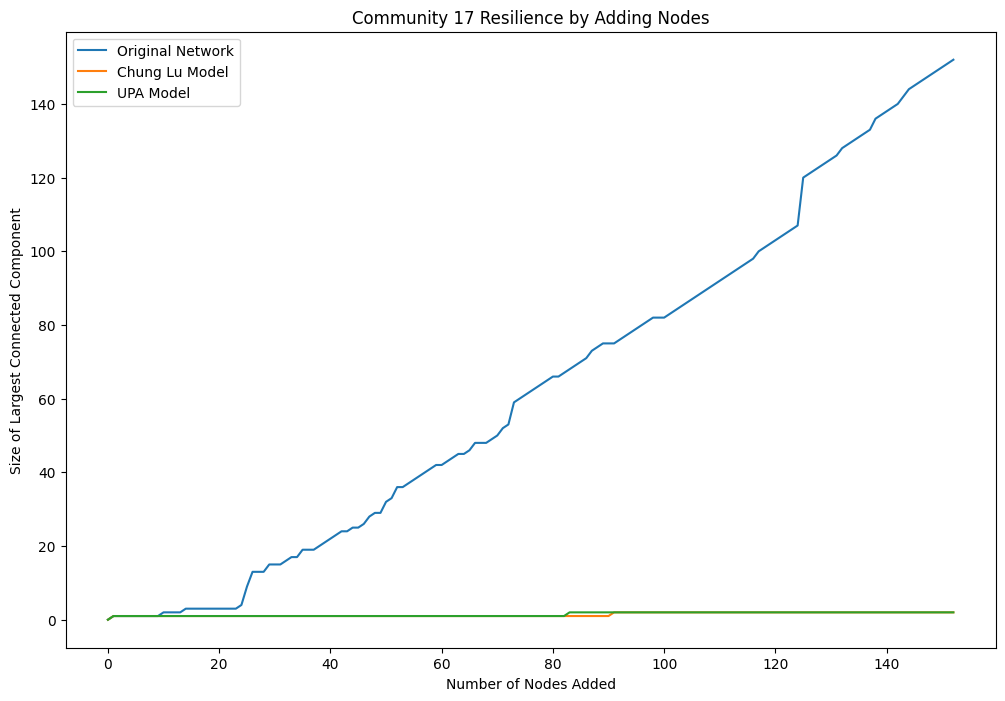

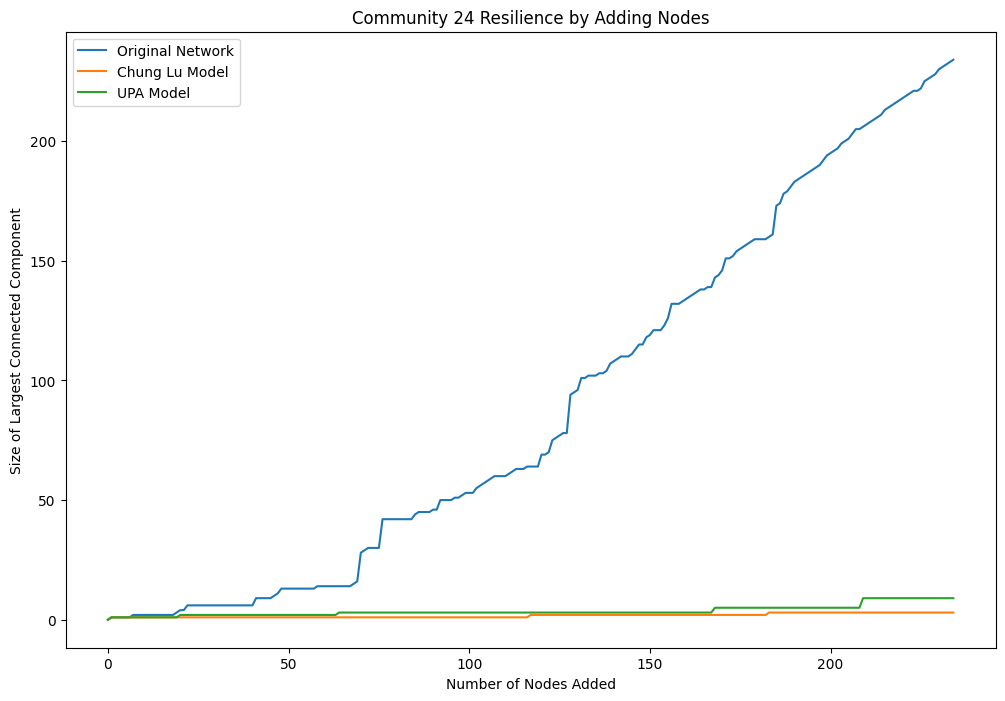

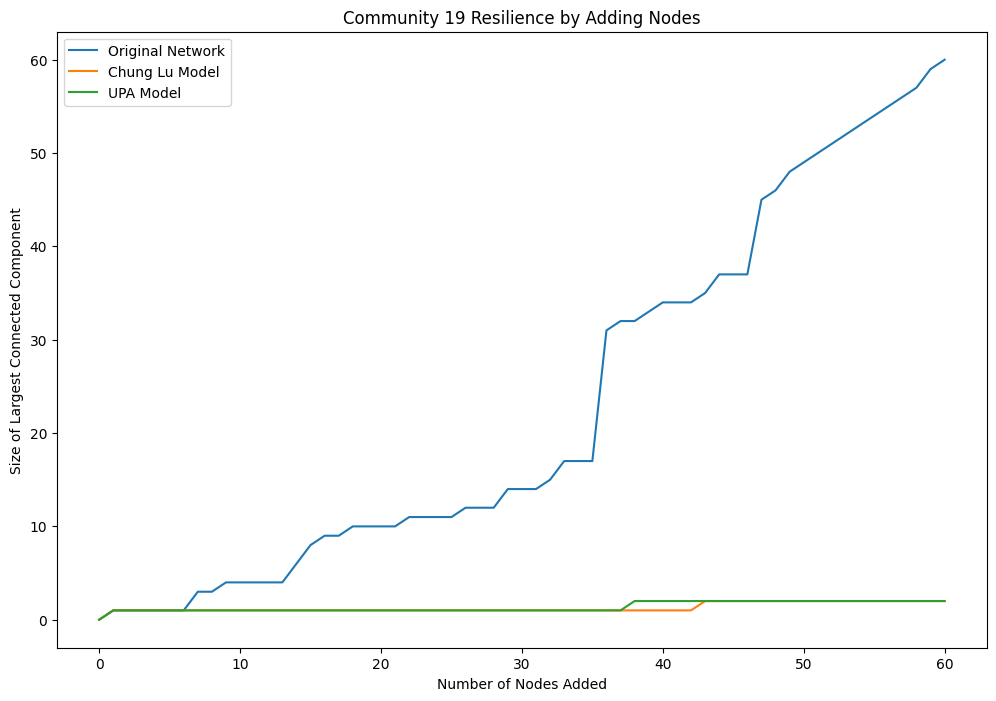

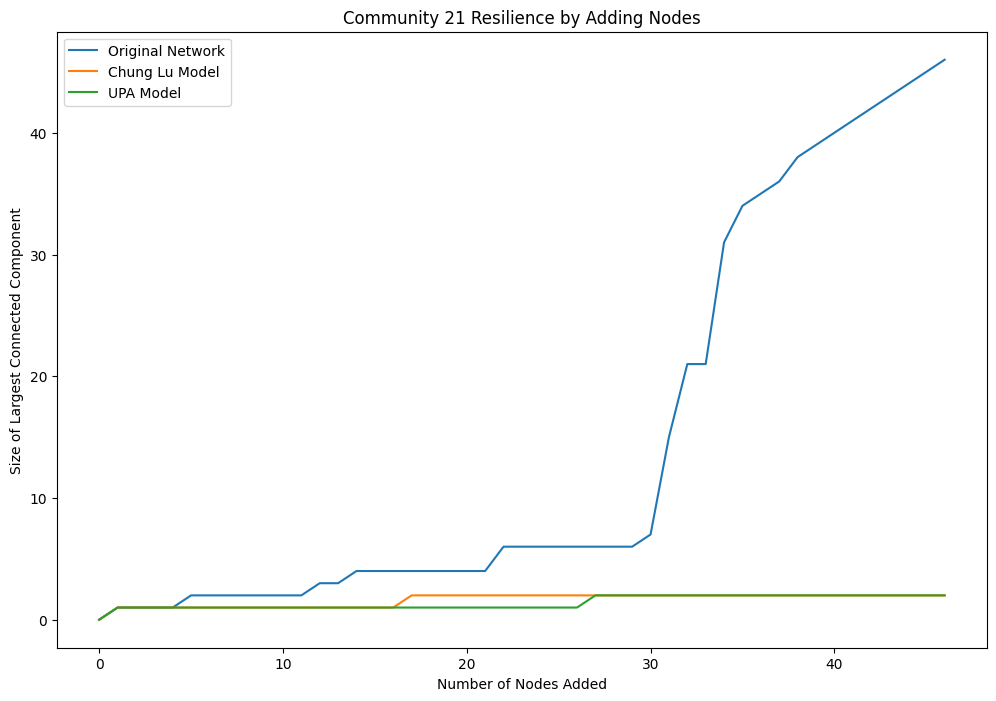

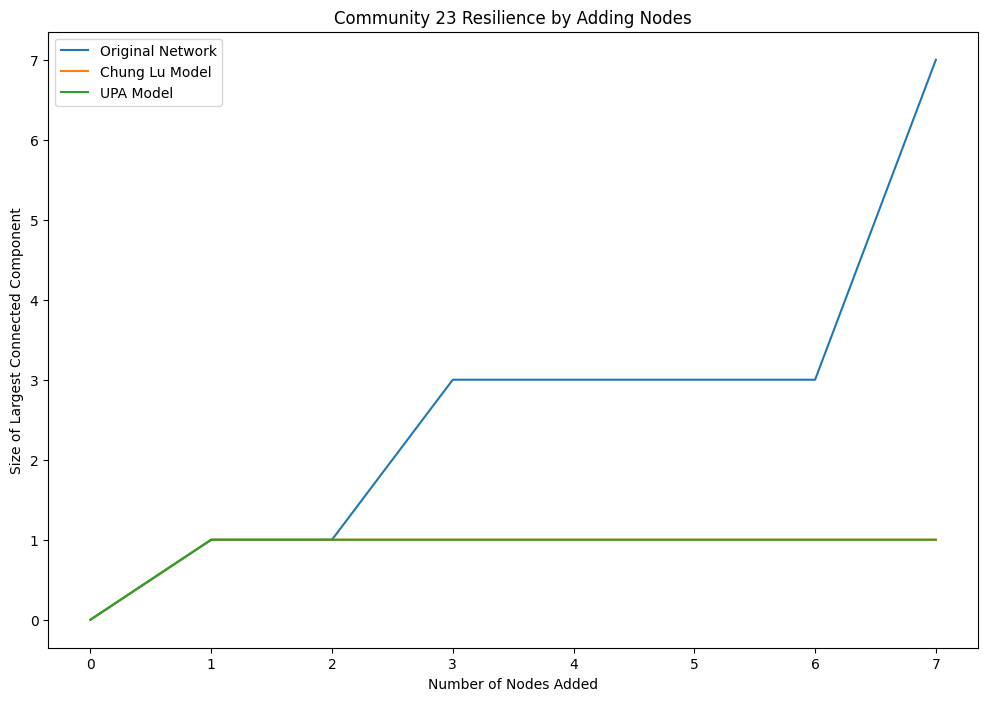

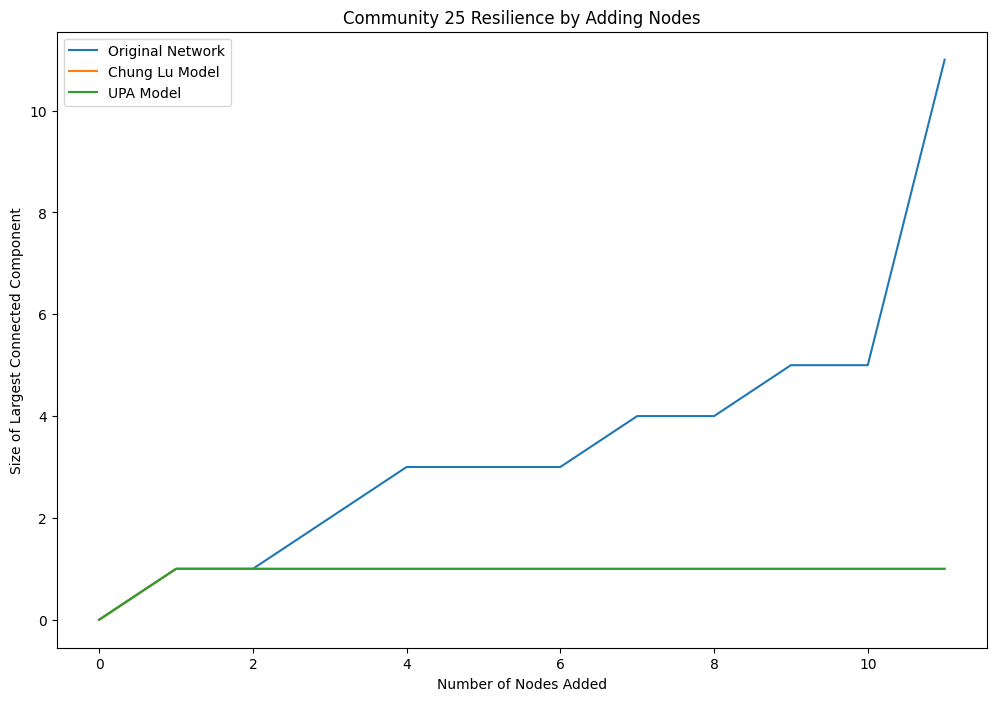

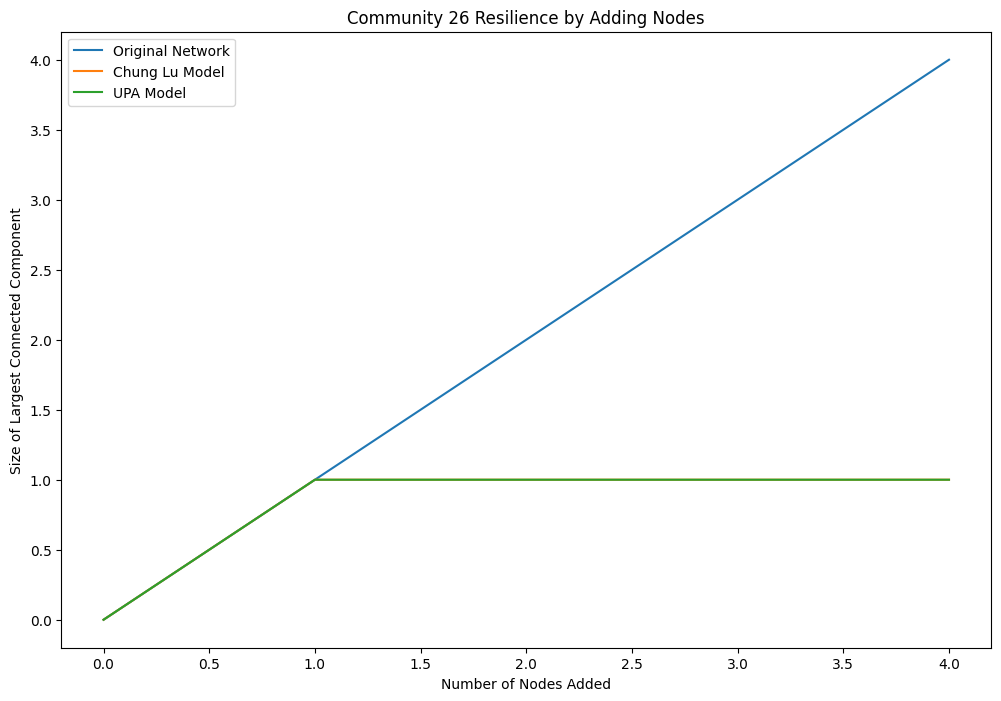

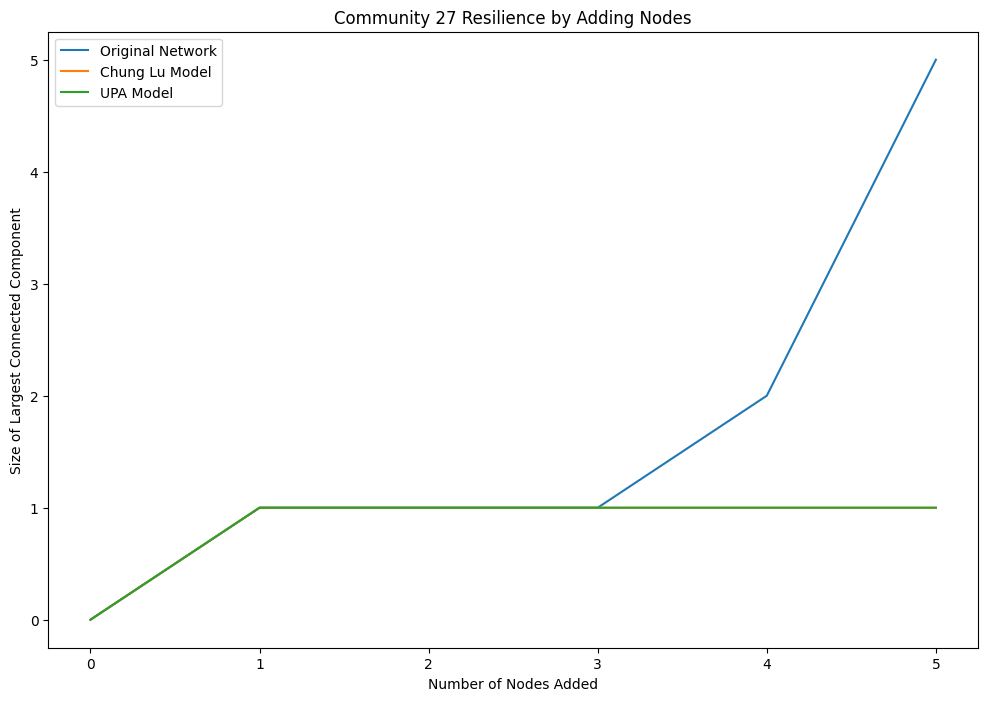

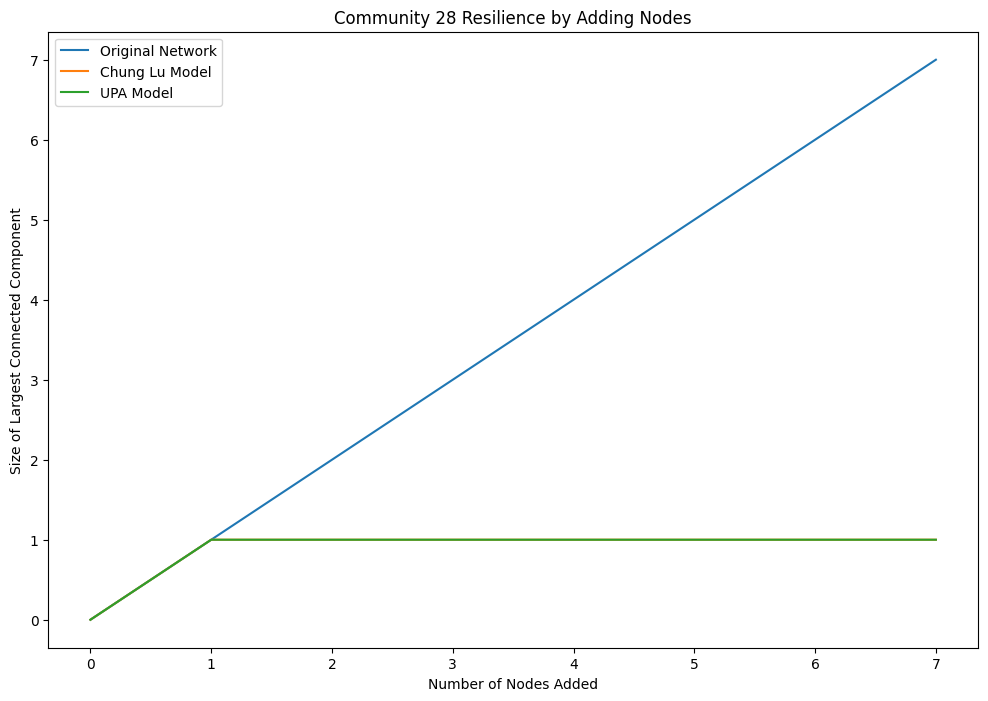

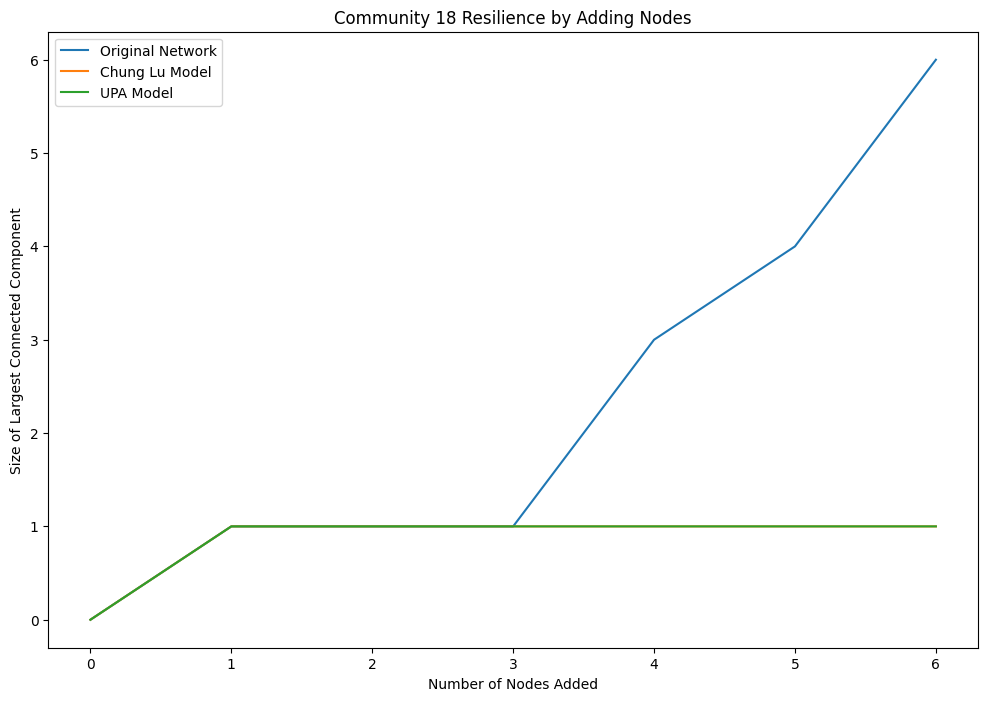

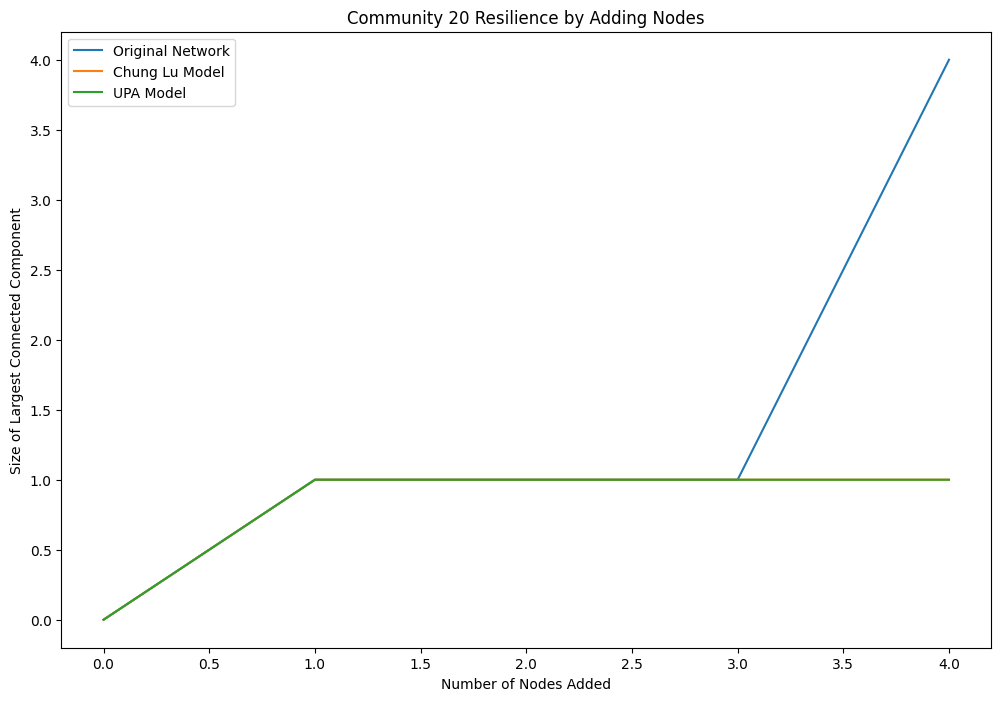

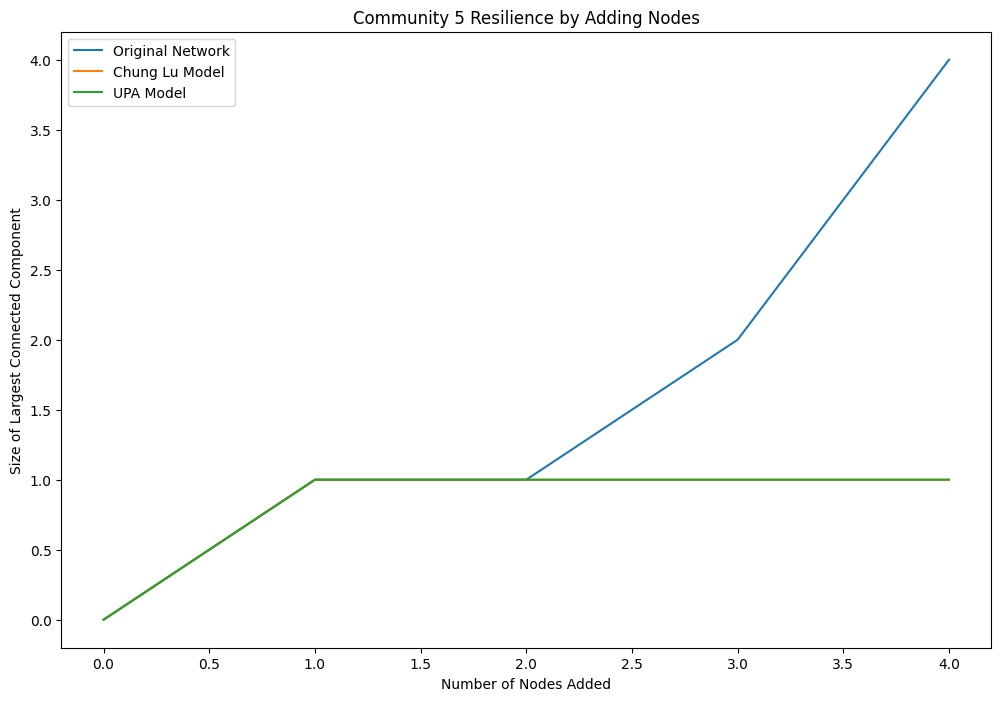

In [17]:
import community as community_louvain
import matplotlib.pyplot as plt

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)
communities = {}
for node, comm_id in partition.items():
    if comm_id not in communities:
        communities[comm_id] = []
    communities[comm_id].append(node)

def random_order(graph):
    """
    Generate a random order of nodes for attacking the graph.
    """
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

def compute_resilience_adding_nodes(graph, attack_order):
    """
    Compute the resilience of the graph as nodes are added according to attack_order.
    """
    resilience = [0]  # Start with an empty graph
    total = len(attack_order)
    added_graph = nx.Graph()
    
    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        # Add edges connected to the new node
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if total > 0 and (i + 1) % max(1, total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience

def compute_community_resilience_adding_nodes(graph, communities):
    """
    Compute the resilience of each community in the graph as nodes are added.
    """
    community_resilience = {}
    for comm_id, nodes in communities.items():
        subgraph = graph.subgraph(nodes).copy()
        attack_order = random_order(subgraph)
        resilience = compute_resilience_adding_nodes(subgraph, attack_order)
        community_resilience[comm_id] = resilience
    return community_resilience

# Compute resilience by adding nodes for communities
print("Computing community resilience for the original graph by adding nodes...")
community_resilience_original = compute_community_resilience_adding_nodes(G, communities)
print("Computing community resilience for the Chung Lu model by adding nodes...")
community_resilience_cl = compute_community_resilience_adding_nodes(chung_lu_graph, communities)
print("Computing community resilience for the UPA model by adding nodes...")
community_resilience_upa = compute_community_resilience_adding_nodes(upa_graph, communities)

# Plotting community resilience
for cid in community_resilience_original:
    plt.figure(figsize=(12, 8))
    plt.plot(community_resilience_original[cid], label='Original Network')
    if cid in community_resilience_cl:
        plt.plot(community_resilience_cl[cid], label='Chung Lu Model')
    if cid in community_resilience_upa:
        plt.plot(community_resilience_upa[cid], label='UPA Model')
    plt.xlabel('Number of Nodes Added')
    plt.ylabel('Size of Largest Connected Component')
    plt.title(f'Community {cid} Resilience by Adding Nodes')
    plt.legend()
    plt.show()


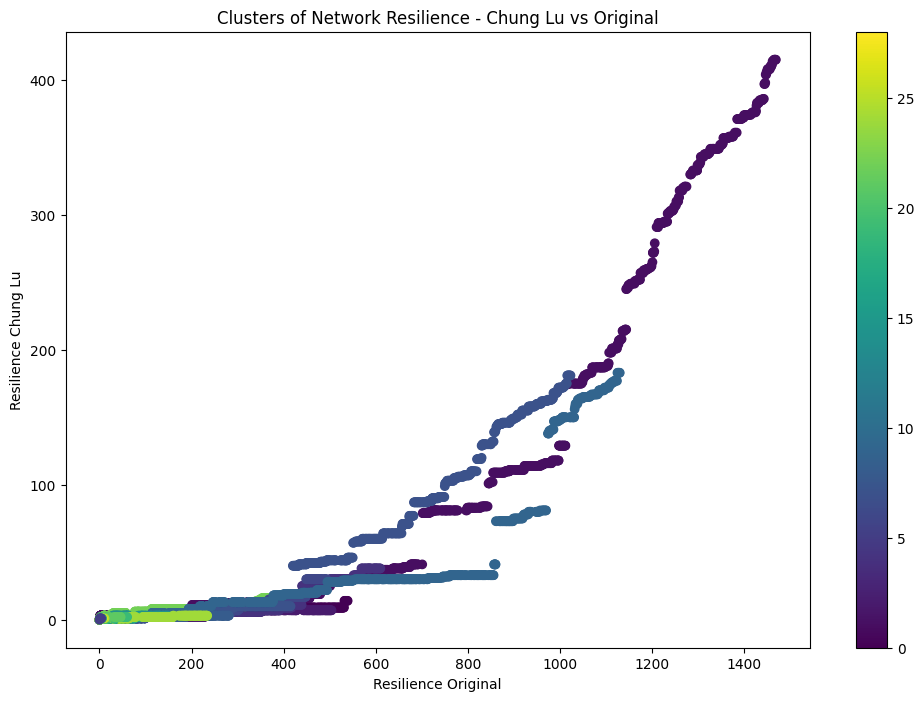

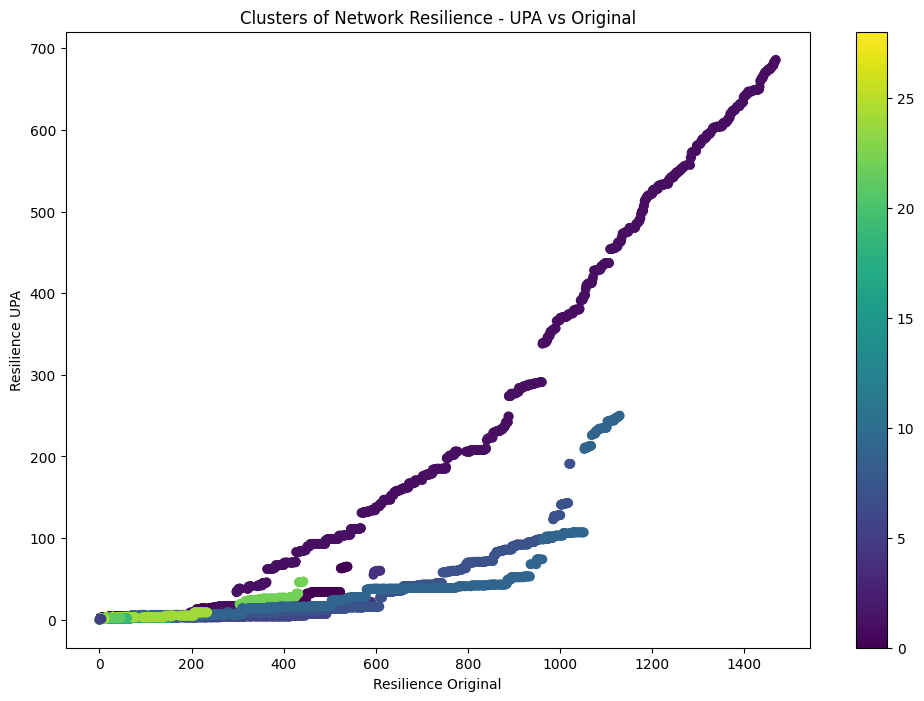

In [18]:
# Calculate and plot overall resilience for all communities together for comparison
def plot_community_resilience_comparison(original_resilience, model_resilience, model_name):
    x_values = []
    y_values = []
    colors = []

    for comm_id, resilience in original_resilience.items():
        for i in range(len(resilience)):
            x_values.append(resilience[i])
            y_values.append(model_resilience.get(comm_id, [0]*len(resilience))[i])
            colors.append(comm_id)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x_values, y_values, c=colors, cmap='viridis')
    plt.xlabel('Resilience Original')
    plt.ylabel(f'Resilience {model_name}')
    plt.title(f'Clusters of Network Resilience - {model_name} vs Original')
    plt.colorbar(scatter)
    plt.show()

# Plot comparisons
plot_community_resilience_comparison(community_resilience_original, community_resilience_cl, "Chung Lu")
plot_community_resilience_comparison(community_resilience_original, community_resilience_upa, "UPA")


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import networkx as nx

# Extract features
features = pd.DataFrame({
    'degree': [d for n, d in G.degree()],
    'target': target_df['target']
})

# Feature scaling
X = features[['degree']]
y = features['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # Utilize all cores
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.15      0.02      0.04       334
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00       135
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00       207
           7       0.00      0.00      0.00        32
           8       0.17      0.01      0.01       138
           9       0.00      0.00      0.00        17
          10       0.19      0.05      0.08       411
          11       0.00      0.00      0.00        32
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00        20
          14       0.11      0.01      0.02       173
          15       0.00      0.00      0.00        82
          16       0.00      0.00      0.00        78
          17       0.21    

/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [20]:
import pandas as pd
import networkx as nx
import community as community_louvain

# Load the data for the LastFM dataset
lastfm_edges_file = 'lastfm_asia_edges.csv'
lastfm_target_file = 'lastfm_asia_target.csv'
lastfm_edges_df = pd.read_csv(lastfm_edges_file)
lastfm_target_df = pd.read_csv(lastfm_target_file)

# Create the LastFM graph
lastfm_G = nx.Graph()
for _, row in lastfm_edges_df.iterrows():
    lastfm_G.add_edge(row['node_1'], row['node_2'])

# Apply the Louvain method to the LastFM dataset
lastfm_partition = community_louvain.best_partition(lastfm_G)
lastfm_modularity = community_louvain.modularity(lastfm_partition, lastfm_G)
print(f"LastFM dataset modularity: {lastfm_modularity}")


LastFM dataset modularity: 0.8142565100344422


LastFM dataset modularity: 0.8148850260331433


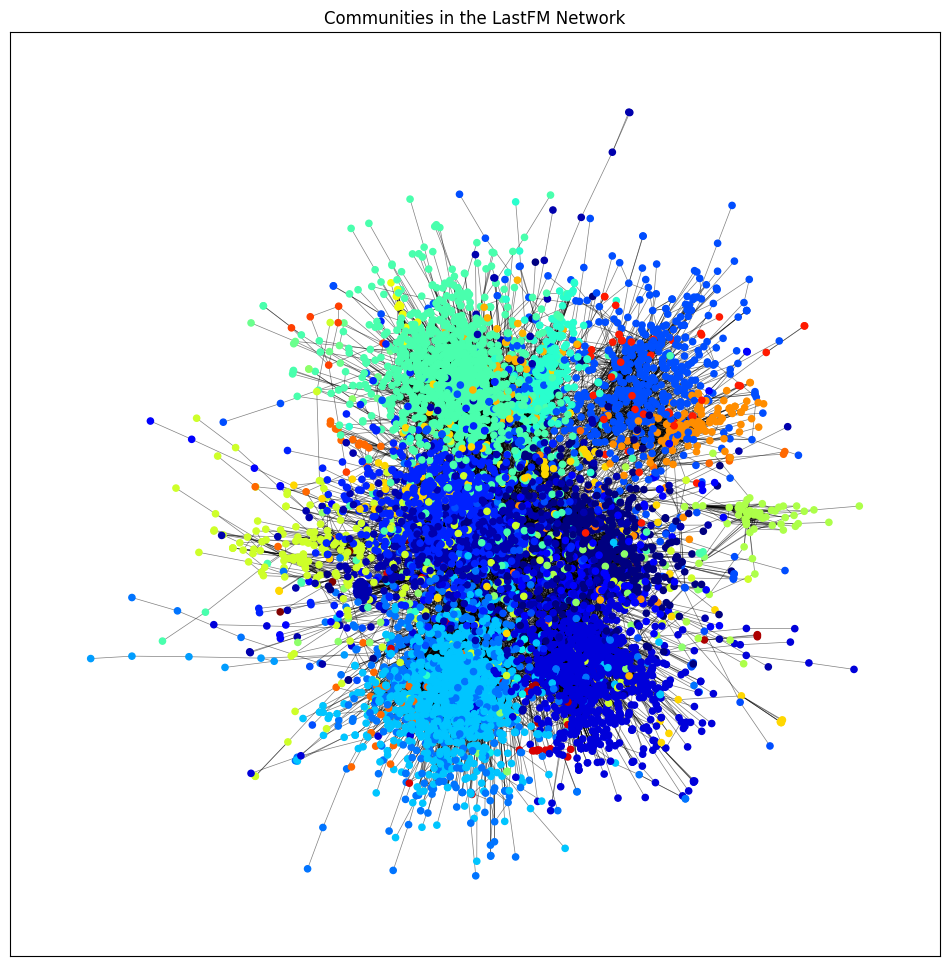

In [21]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain

# Load the LastFM dataset
edges = pd.read_csv('lastfm_asia_edges.csv')

# Create the graph
G_lastfm = nx.from_pandas_edgelist(edges, source='node_1', target='node_2')

# Detect communities using the Louvain method
partition_lastfm = community_louvain.best_partition(G_lastfm)

# Compute modularity score
modularity_lastfm = community_louvain.modularity(partition_lastfm, G_lastfm)
print(f"LastFM dataset modularity: {modularity_lastfm}")

# Visualization of communities
pos = nx.spring_layout(G_lastfm, seed=42)  # Fixed seed for reproducibility
plt.figure(figsize=(12, 12))
nx.draw_networkx_edges(G_lastfm, pos, alpha=0.5, edge_color='k', width=0.5)

colors = [partition_lastfm[node] for node in G_lastfm.nodes()]
nx.draw_networkx_nodes(G_lastfm, pos, node_color=colors, node_size=20, cmap=plt.cm.jet)

plt.title('Communities in the LastFM Network')
plt.show()


LastFM dataset modularity: 0.8146852837077336


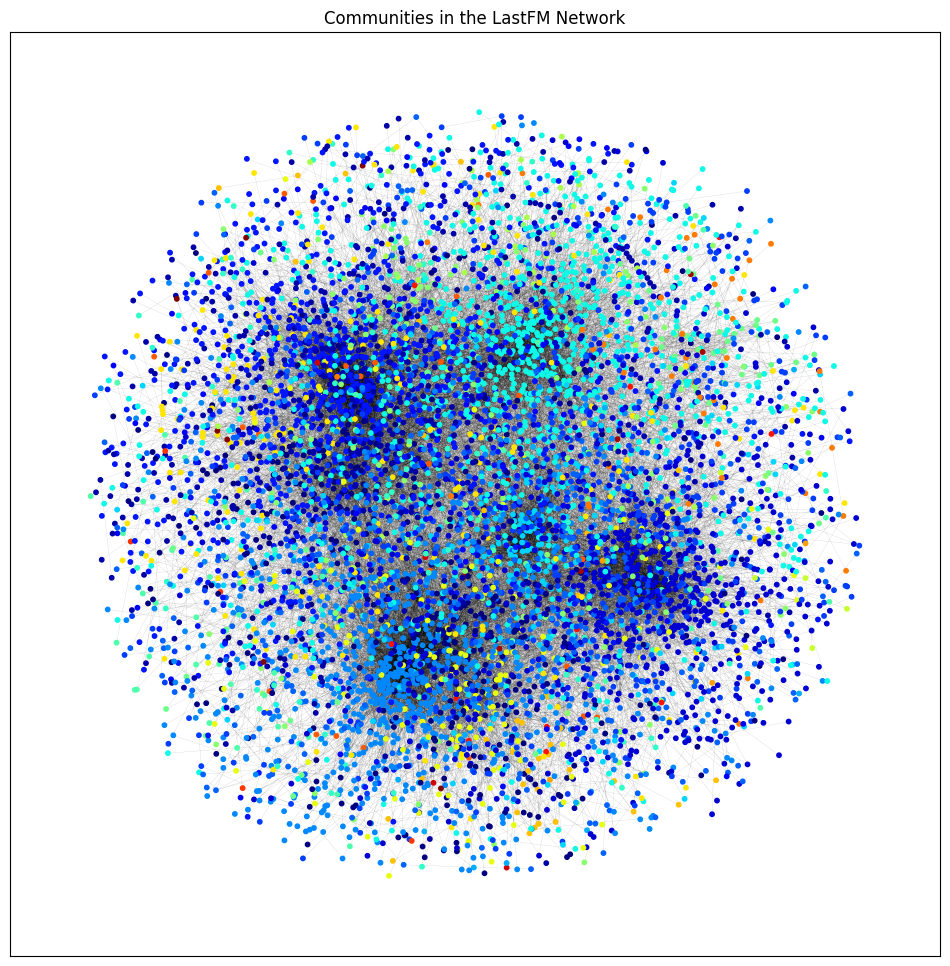

In [22]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain

# Load the LastFM dataset
edges = pd.read_csv('lastfm_asia_edges.csv')

# Create the graph
G_lastfm = nx.from_pandas_edgelist(edges, source='node_1', target='node_2')

# Detect communities using the Louvain method
partition_lastfm = community_louvain.best_partition(G_lastfm)

# Compute modularity score
modularity_lastfm = community_louvain.modularity(partition_lastfm, G_lastfm)
print(f"LastFM dataset modularity: {modularity_lastfm}")

# Visualization of communities with improved layout
pos = nx.spring_layout(G_lastfm, seed=42, k=0.1)  # Fixed seed for reproducibility and increased k for more separation
plt.figure(figsize=(12, 12))
nx.draw_networkx_edges(G_lastfm, pos, alpha=0.2, edge_color='k', width=0.2)

colors = [partition_lastfm[node] for node in G_lastfm.nodes()]
nx.draw_networkx_nodes(G_lastfm, pos, node_color=colors, node_size=10, cmap=plt.cm.jet)

plt.title('Communities in the LastFM Network')
plt.show()


Size of the largest connected component after adding edges: 7624


/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


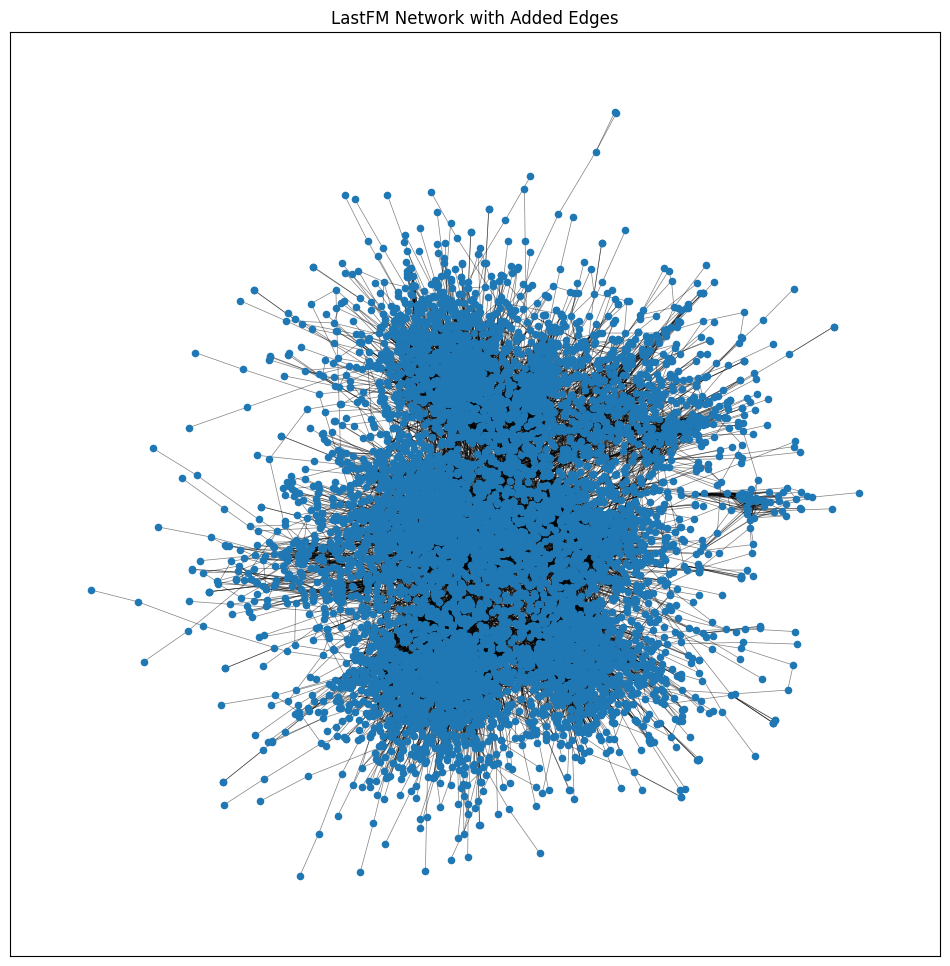

In [23]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load the LastFM dataset
edges_lastfm = pd.read_csv('lastfm_asia_edges.csv')

# Create the graph
G_lastfm = nx.from_pandas_edgelist(edges_lastfm, source='node_1', target='node_2')

# Function to add random edges
def add_random_edges(G, num_edges):
    added_edges = []
    nodes = list(G.nodes())
    while len(added_edges) < num_edges:
        u = random.choice(nodes)
        v = random.choice(nodes)
        if u != v and not G.has_edge(u, v):
            G.add_edge(u, v)
            added_edges.append((u, v))
    return added_edges

# Add edges and evaluate resilience
num_edges_to_add = 100  # Adjust the number as needed
added_edges = add_random_edges(G_lastfm, num_edges_to_add)

# Compute the size of the largest connected component
largest_cc_size = len(max(nx.connected_components(G_lastfm), key=len))
print(f"Size of the largest connected component after adding edges: {largest_cc_size}")

# Visualization
pos = nx.spring_layout(G_lastfm, seed=42)  # Fixed seed for reproducibility
plt.figure(figsize=(12, 12))
nx.draw_networkx_edges(G_lastfm, pos, alpha=0.5, edge_color='k', width=0.5)
nx.draw_networkx_nodes(G_lastfm, pos, node_size=20, cmap=plt.cm.jet)
plt.title('LastFM Network with Added Edges')
plt.show()
